In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import astropy.io.fits as pf
from astropy.time import Time
import matplotlib.pyplot as plt
from scipy.stats import linregress

datadir = '/Users/peter/Projects/starlink_data/'
savedir = datadir + 'images/thesis/'

In [2]:
def plot_time_sequence(camid, lstseqs, satnum, savefig=False):
    
    files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
    vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
    
    JDs = []
    xpos = []
    ypos = []
    mags = []

    for lstseq in lstseqs:
        curlstseq = str(lstseq)
        if curlstseq not in vmags.keys():
            continue
        JDs.append(vmags[curlstseq]['JD0'])
        xpos.append(vmags[curlstseq][satnum]['FOTOS']['x'][0])
        ypos.append(vmags[curlstseq][satnum]['FOTOS']['y'][0])
        mags.append(vmags[curlstseq][satnum]['vmag'])
    sat = vmags[curlstseq][satnum]['name']
    
    
    times = Time(JDs, format='jd')
    seconds_per_day = 86400
    for i in range(len(JDs)-1):
        print((times[i+1] - times[i])*seconds_per_day)

        
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=[16,4])
    ax1.plot_date(times.plot_date, xpos, '-o', label='x')
    ax1.plot_date(times.plot_date, ypos, '-o', label='y')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Position')
    ax1.set_title(f'{camid}: {sat}')
    ax1.legend()
    ax1.invert_yaxis()
    ax1.grid(True)

    ax2.plot_date(times.plot_date, mags, '-o', c='C2')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('vmag')
    ax2.set_title(f'{camid}: {sat}')
    ax2.grid(True)
    
    plt.tight_layout()
    if savefig:
        plt.savefig(f'time_sequence_{camid}.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

6.382986903190613
6.382986903190613
6.382946670055389
6.38306736946106
12.765933573246002
6.38306736946106
25.510986149311066


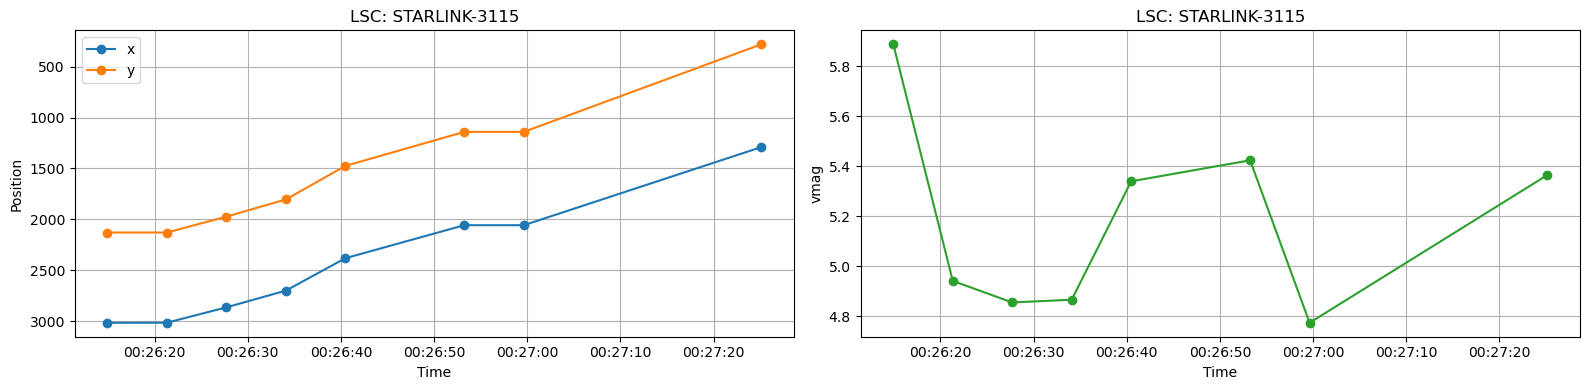

In [3]:
camid = 'LSC'
lstseqs = np.linspace(48506290, 48506301, num=10, endpoint=True, dtype=int)
satnum = '49447U'

# camid = 'LSN'
# lstseqs = np.linspace(48506337, 48506346, num=10, endpoint=True, dtype=int)
# satnum = '45764U'

# camid = 'LSS'
# lstseqs = np.linspace(48506363, 48506374, num=10, endpoint=True, dtype=int)
# satnum = '44927U'

# camid = 'LSE'
# lstseqs = np.linspace(48506274, 48506283, num=10, endpoint=True, dtype=int)
# satnum = '48369U'

# camid = 'LSW'
# lstseqs = np.linspace(48506303, 48506313, num=11, endpoint=True, dtype=int)
# satnum = '44928U'


plot_time_sequence(camid, lstseqs, satnum, savefig=False)

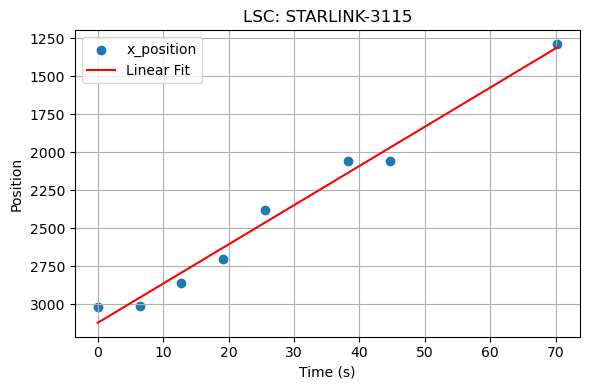

In [4]:
files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')

JDs = []
xpos = []
ypos = []
mags = []

for lstseq in lstseqs:
    curlstseq = str(lstseq)
    if curlstseq not in vmags.keys():
        continue
    JDs.append(vmags[curlstseq]['JD0'])
    xpos.append(vmags[curlstseq][satnum]['FOTOS']['x'][0])
    ypos.append(vmags[curlstseq][satnum]['FOTOS']['y'][0])
    mags.append(vmags[curlstseq][satnum]['vmag'])
sat = vmags[curlstseq][satnum]['name']

times = Time(JDs, format='jd')
seconds_per_day = 86400
elapsed_time = ((times - times[0]) * 86400).value

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, xpos)

# Generate the line based on the linear regression parameters
line = slope * elapsed_time + intercept

fig, (ax1) = plt.subplots(1, 1, figsize=[6,4])
ax1.scatter(elapsed_time, xpos, label='x_position')
ax1.plot(elapsed_time, line, color='r', label='Linear Fit')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position')
ax1.set_title(f'{camid}: {sat}')
ax1.legend()
ax1.invert_yaxis()
ax1.grid(True)

plt.tight_layout()
plt.show()

In [5]:
def plot_time_sequence_seconds(camid, lstseqs, satnum, savefig=False):
    
    files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
    vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
    
    JDs = []
    xpos = []
    ypos = []
    mags = []

    for lstseq in lstseqs:
        curlstseq = str(lstseq)
        if curlstseq not in vmags.keys():
            continue
        JDs.append(vmags[curlstseq]['JD0'])
        xpos.append(vmags[curlstseq][satnum]['FOTOS']['x'][0])
        ypos.append(vmags[curlstseq][satnum]['FOTOS']['y'][0])
        mags.append(vmags[curlstseq][satnum]['vmag'])
    sat = vmags[curlstseq][satnum]['name']
    
    
    times = Time(JDs, format='jd')
    seconds_per_day = 86400

    timesteps = []
    for i in range(len(JDs)):
        t = (times[i] - times[0])*seconds_per_day
        timesteps.append(t.value)

        
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=[16,4])
    ax1.plot(timesteps, xpos, '-o', label='x')
    ax1.plot(timesteps, ypos, '-o', label='y')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Position')
    ax1.set_title(f'{camid}: {sat}')
    ax1.legend()
    ax1.invert_yaxis()
    ax1.grid(True)

    ax2.plot(timesteps, mags, '-o', c='C2')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('vmag')
    ax2.set_title(f'{camid}: {sat}')
    ax2.grid(True)
    
    plt.tight_layout()
    if savefig:
        plt.savefig(f'time_seifquence_secs_{camid}.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

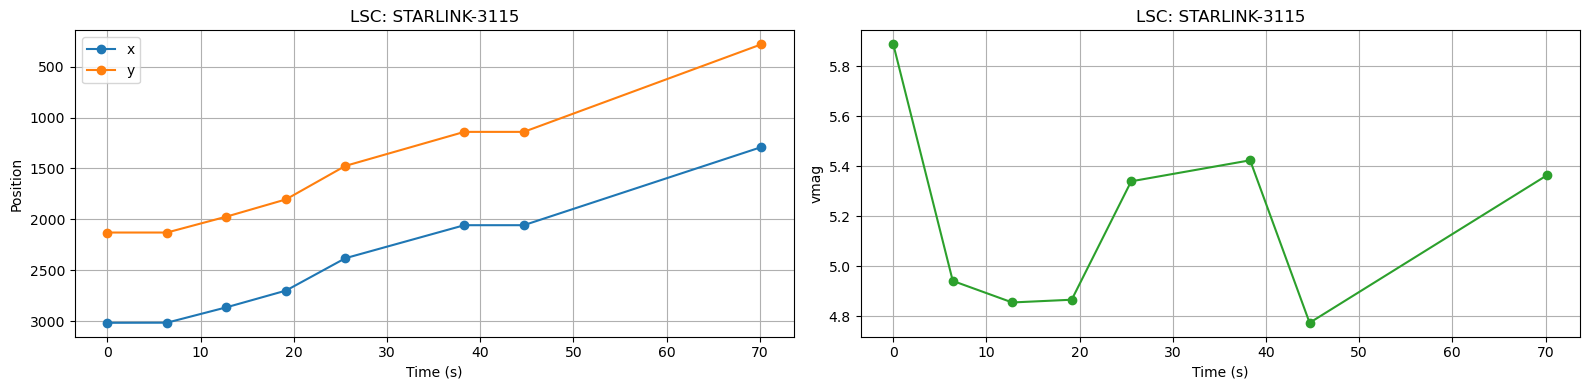

In [6]:
plot_time_sequence_seconds(camid, lstseqs, satnum, savefig=False)

In [7]:
def linear_fits(savefig=False):
    
    plt.figure(figsize=[16,8])
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axes = [ax1,ax2,ax3,ax4,ax5]
    camids = ['LSC', 'LSN', 'LSS', 'LSE', 'LSW']
    satnums = ['49447U', '45764U', '44927U', '48369U', '44928U']
    
    for ax, camid, satnum in zip(axes, camids, satnums):
    
        files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
        vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
        
        lstseqs = []
        for f in files:
            lstseqs.append(f[-19:-11])

        JDs = []
        xpos = []
        ypos = []
        mags = []

        for lstseq in lstseqs:
            curlstseq = str(lstseq)
            if curlstseq not in vmags.keys():
                continue
            JDs.append(vmags[curlstseq]['JD0'])
            xpos.append(vmags[curlstseq][satnum]['FOTOS']['x'][0])
            ypos.append(vmags[curlstseq][satnum]['FOTOS']['y'][0])
            mags.append(vmags[curlstseq][satnum]['vmag'])
        sat = vmags[curlstseq][satnum]['name']

        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * 86400).value

        
        # linear regression
        slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, ypos)

        # Generate the line based on the linear regression parameters
        line = slope * elapsed_time + intercept
        
        # Compute the residuals (difference between observed y-values and predicted y-values)
        residuals = ypos - line

        # Compute the RMS of the residuals
        rms = np.sqrt(np.mean(residuals**2))
        
        # Normalize the RMS to the range of the data
        y_range = max(ypos) - min(ypos)
        normalized_rms = rms / y_range
        
        
        ax.scatter(elapsed_time, ypos, label='y_position')
        ax.plot(elapsed_time, line, color='r', label=f'Linear fit: Normalized RMS = {round(normalized_rms,2)}')
        ax.set_title(f'{camid}: {sat}')
        ax.legend()
        ax.invert_yaxis()
        ax.grid(True)
    
    ax1.set_ylabel('Pixel Position')
    ax4.set_ylabel('Pixel Position')
    ax4.set_xlabel('T(s)')
    ax5.set_xlabel('T(s)')
    plt.tight_layout()
    
    if savefig:
        plt.savefig('linear_fits.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

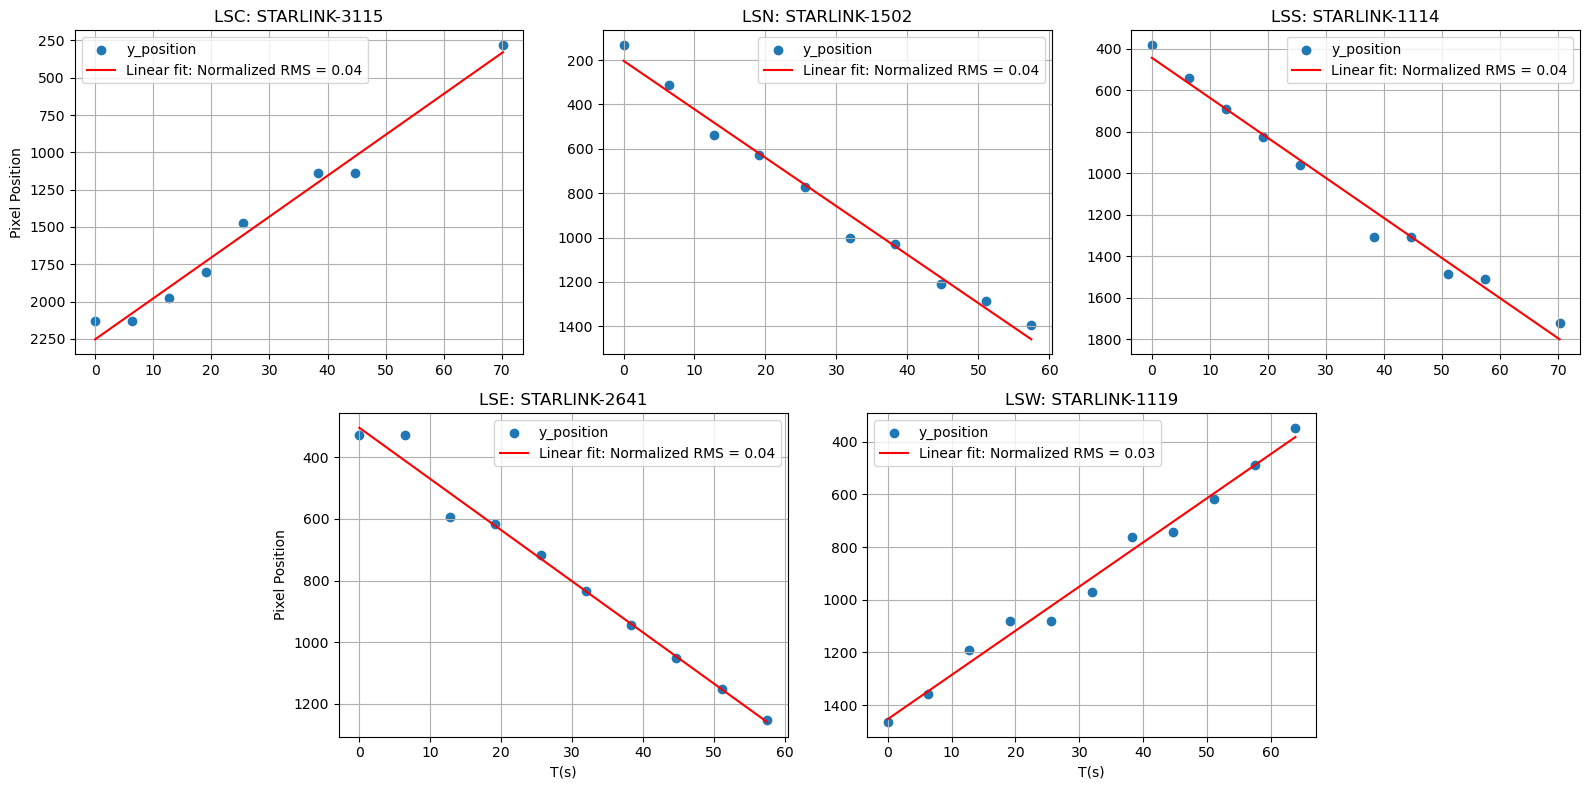

In [8]:
linear_fits(savefig=False)

## Line length

In [9]:
def length_time_sequence(savefig=False):
    
    plt.figure(figsize=[16,8])
    ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
    ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
    ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
    ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
    ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axes = [ax1,ax2,ax3,ax4,ax5]
    camids = ['LSC', 'LSN', 'LSS', 'LSE', 'LSW']
    satnums = ['49447U', '45764U', '44927U', '48369U', '44928U']
    
    for ax, camid, satnum in zip(axes, camids, satnums):
    
        files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
        vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
        
        lstseqs = []
        for f in files:
            lstseqs.append(f[-19:-11])

        JDs = []
        tle_length = []
        fot_length = []

        for lstseq in lstseqs:
            curlstseq = str(lstseq)
            if curlstseq not in vmags.keys():
                continue
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        sat = vmags[curlstseq][satnum]['name']

        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * 86400).value
        
        ax.plot(elapsed_time, tle_length, '-o', label='TLE')
        ax.plot(elapsed_time, fot_length, '-o', label='FOTOS')
        ax.set_title(f'{camid}: {sat}')
        ax.legend(frameon=False)
        ax.grid(True, alpha=0.5)
    
    ax1.set_ylabel('Length (px)')
    ax4.set_ylabel('Length (px)')
    ax4.set_xlabel('T(s)')
    ax5.set_xlabel('T(s)')
    plt.tight_layout()
    
    if savefig:
        plt.savefig('length_time_seq.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

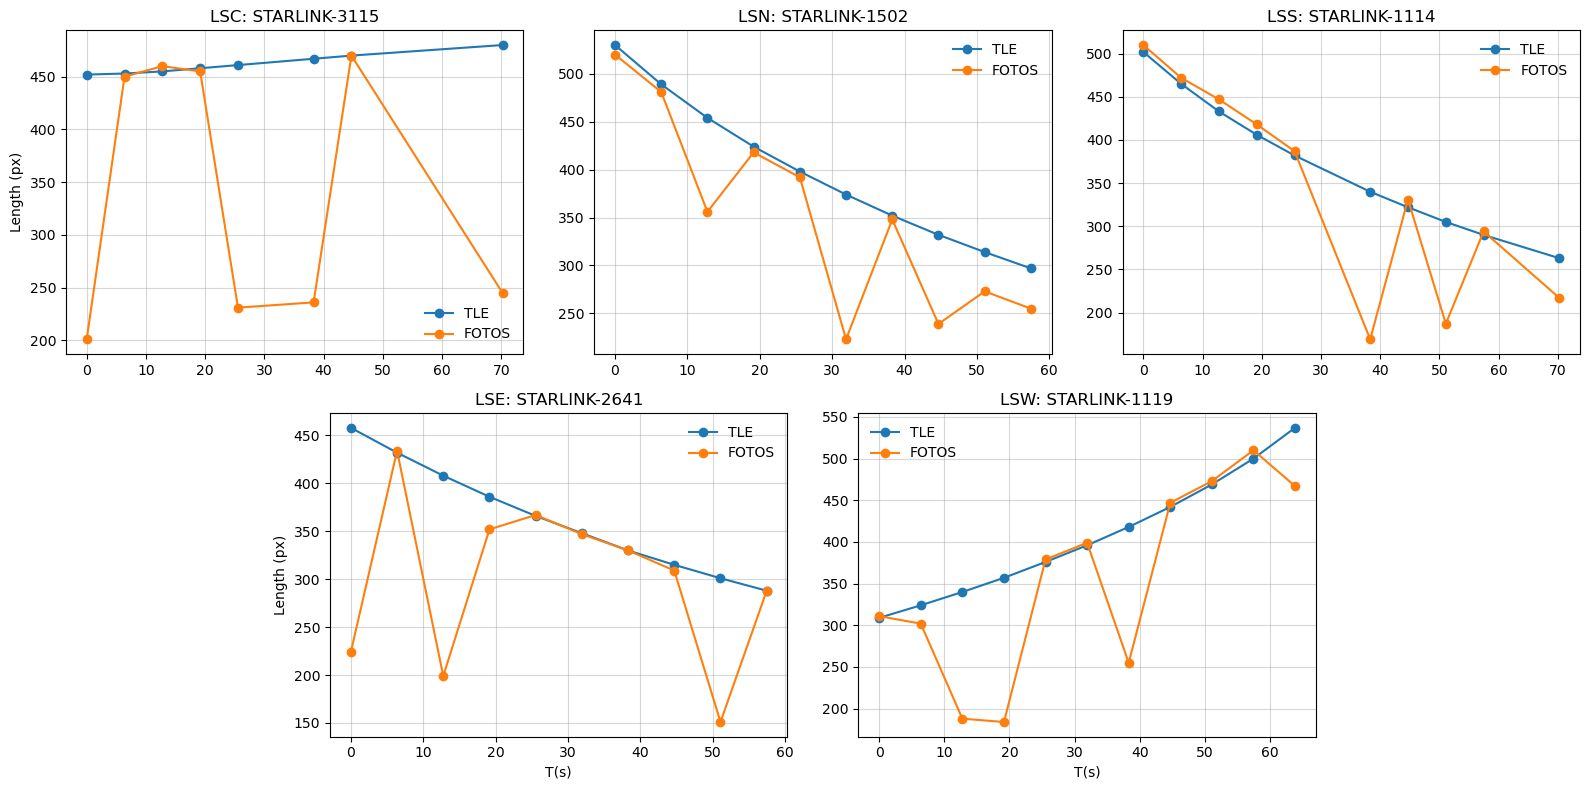

In [10]:
length_time_sequence(savefig=False)

## Conversion factor: get from reference brightness i.e. slope from background stars

In [2]:
import bringreduce.configuration as cfg
cfg.initialize('20221023LSC')
starcat = pf.getdata(cfg.starcat)
np.sort(starcat.dtype.names)

array(['ASCC', 'Blend', 'Bmag', 'Dist10', 'Dist6', 'Dist8', 'Duplicate',
       'GDE', 'GRA', 'Gmag', 'HD', 'HIP', 'Inclusion', 'Par', 'SKYIDX',
       'SpType', 'TYC1', 'TYC2', 'VSXid', 'Var', 'Vmag', '_DEJ2000',
       '_RAJ2000', 'ePar'], dtype='<U9')

popt, pcov = curve_fit(self.fitmagfunc, starsflux, starsvmag)

In this line of code, the curve_fit function from the SciPy library is called to fit the fitmagfunc function to the data points consisting of starsflux (logarithmic flux values) and starsvmag (apparent visual magnitudes). The curve_fit function finds the optimal parameters (popt) that best approximate the relationship between these two variables according to the specified function.

The resulting popt represents the parameters of the fitted function, in this case, the slope and intercept of the linear equation. By fitting the fitmagfunc function to the data, the fitting procedure determines the best-fit parameters that can be considered as conversion factors for estimating the brightness magnitude based on the logarithmic flux values.

To calculate the brightness magnitude (satvmag) of a satellite trail using the fitted function, you can use the obtained popt parameters along with the logarithmic flux value (satflux) as follows:

satvmag = self.fitmagfunc(satflux, * popt)


Here, self.fitmagfunc is the fitted function, satflux is the logarithmic flux value of the satellite trail, and * popt unpacks the optimal parameters obtained from the fitting procedure.

In summary, **the conversion factor in this code snippet is derived from the fitting procedure, where the optimal parameters (popt) of the fitted function represent the coefficients of the linear equation**. The fitted function can then be used to estimate the brightness magnitude of a satellite trail based on its logarithmic flux value.

In [3]:
def flux_conv_factor(savefig=False):
    
    camids = ['LSC', 'LSN', 'LSS', 'LSE', 'LSW']
    satnums = ['49447U', '45764U', '44927U', '48369U', '44928U']
    
    fig, axs = plt.subplots(5, 2, figsize=[16,16])
    
    for i, (camid, satnum) in enumerate(zip(camids, satnums)):
        
        files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
        vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
        
        lstseqs = []
        for f in files:
            lstseqs.append(f[-19:-11])

        JDs = []
        tle_length = []
        fot_length = []
        flux = []
        popt = []

        for lstseq in lstseqs:
            curlstseq = str(lstseq)
            
            if curlstseq not in vmags.keys():
                continue
                
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
            flux.append(vmags[curlstseq][satnum]['flux'])
            popt.append(vmags[curlstseq][satnum]['popt'])
        sat = vmags[curlstseq][satnum]['name']
    
        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * seconds_per_day).value
        
        axs[i,0].plot(elapsed_time, flux, '-o', c='C0', label='Flux')
        axs[i,0].set_title(f'{camid}: {sat}')
        axs[i,0].legend(frameon=False)
        axs[i,0].grid(True, alpha=0.5)
        
        axs[i,1].plot(elapsed_time, popt, '-o', c='C1', label='Conv. Factor')
        axs[i,1].set_title(f'{camid}: {sat}')
        axs[i,1].legend(frameon=False)
        axs[i,1].grid(True, alpha=0.5)

    plt.tight_layout()
    if savefig:
        plt.savefig('flux_conv_factor.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

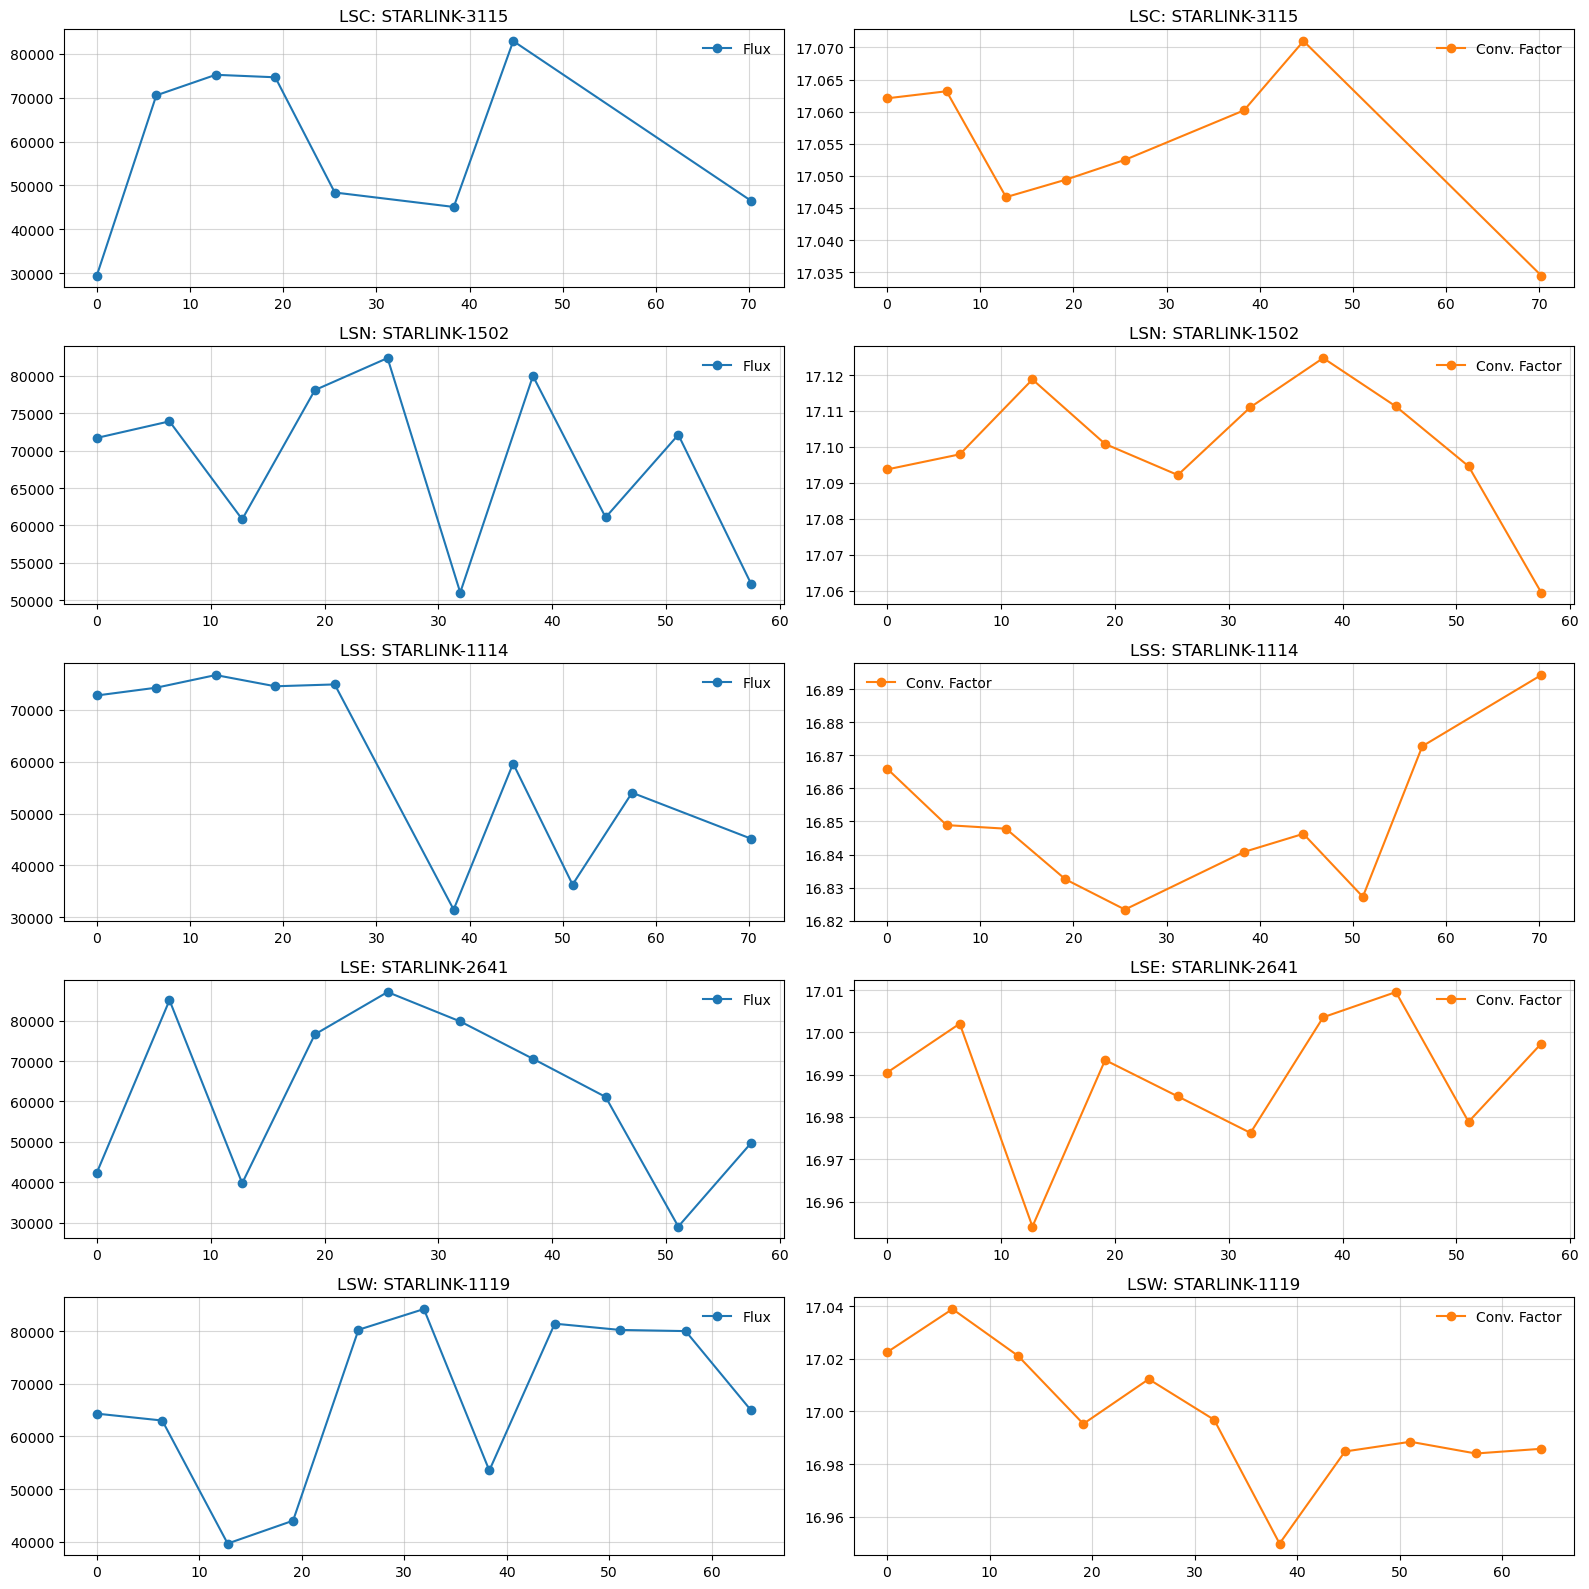

In [4]:
flux_conv_factor(savefig=False)

In [14]:
def length_flux_time(savefig=False):
    
    plt.figure(figsize=[15,12])
    ax1 = plt.subplot2grid(shape=(3,6), loc=(0,0), colspan=3)
    ax2 = plt.subplot2grid((3,6), (0,3), colspan=3)
    ax3 = plt.subplot2grid((3,6), (1,0), colspan=3)
    ax4 = plt.subplot2grid((3,6), (1,3), colspan=3)
    ax5 = plt.subplot2grid((3,6), (2,1), colspan=4)
    
    axes = [ax1,ax2,ax3,ax4,ax5]
    camids = ['LSC', 'LSN', 'LSS', 'LSE', 'LSW']
    satnums = ['49447U', '45764U', '44927U', '48369U', '44928U']
    
    for i, (ax, camid, satnum) in enumerate(zip(axes, camids, satnums), start=1):
    
        files = sorted(glob.glob(f'{datadir}test_data/diff_images/{camid}/uncertainty_tests/*')) 
        vmags = pd.read_pickle(f'{datadir}full_data/vmags_{camid}.p')
        
        lstseqs = []
        for f in files:
            lstseqs.append(f[-19:-11])

        JDs = []
        tle_length = []
        fot_length = []
        flux = []
        popt = []

        for lstseq in lstseqs:
            curlstseq = str(lstseq)
            if curlstseq not in vmags.keys():
                continue  
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
            flux.append(vmags[curlstseq][satnum]['flux'])
            popt.append(vmags[curlstseq][satnum]['popt'])
        sat = vmags[curlstseq][satnum]['name']
    
        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * seconds_per_day).value
        
        a = ax.plot(elapsed_time, tle_length, '-o', c='C0', label='TLE')
        b = ax.plot(elapsed_time, fot_length, '-o', c='C8', label='FOTOS')
        ax.set_title(f'{camid}: {sat}')
        ax.grid(True, axis='x', alpha=0.5)
        
        twin = ax.twinx()
        c = twin.plot(elapsed_time, flux, '-o', c='C3', label='Flux')
        twin.set_title(f'{camid}: {sat}')
        
        curves = a + b + c
        labels = [curve.get_label() for curve in curves]
        twin.legend(curves, labels, facecolor='w', framealpha=1)
        
        if (i % 2) != 0:
            ax.set_ylabel('Length [px]')
        else:
            twin.set_ylabel('Flux [ADU]')
    
    ax.set_xlabel('Time [s]')
    twin.set_ylabel('Flux [ADU]') 
    plt.tight_layout()
    
    if savefig:
        plt.savefig('length_flux_time.png', facecolor='w', bbox_inches='tight', dpi=300)

    plt.show()

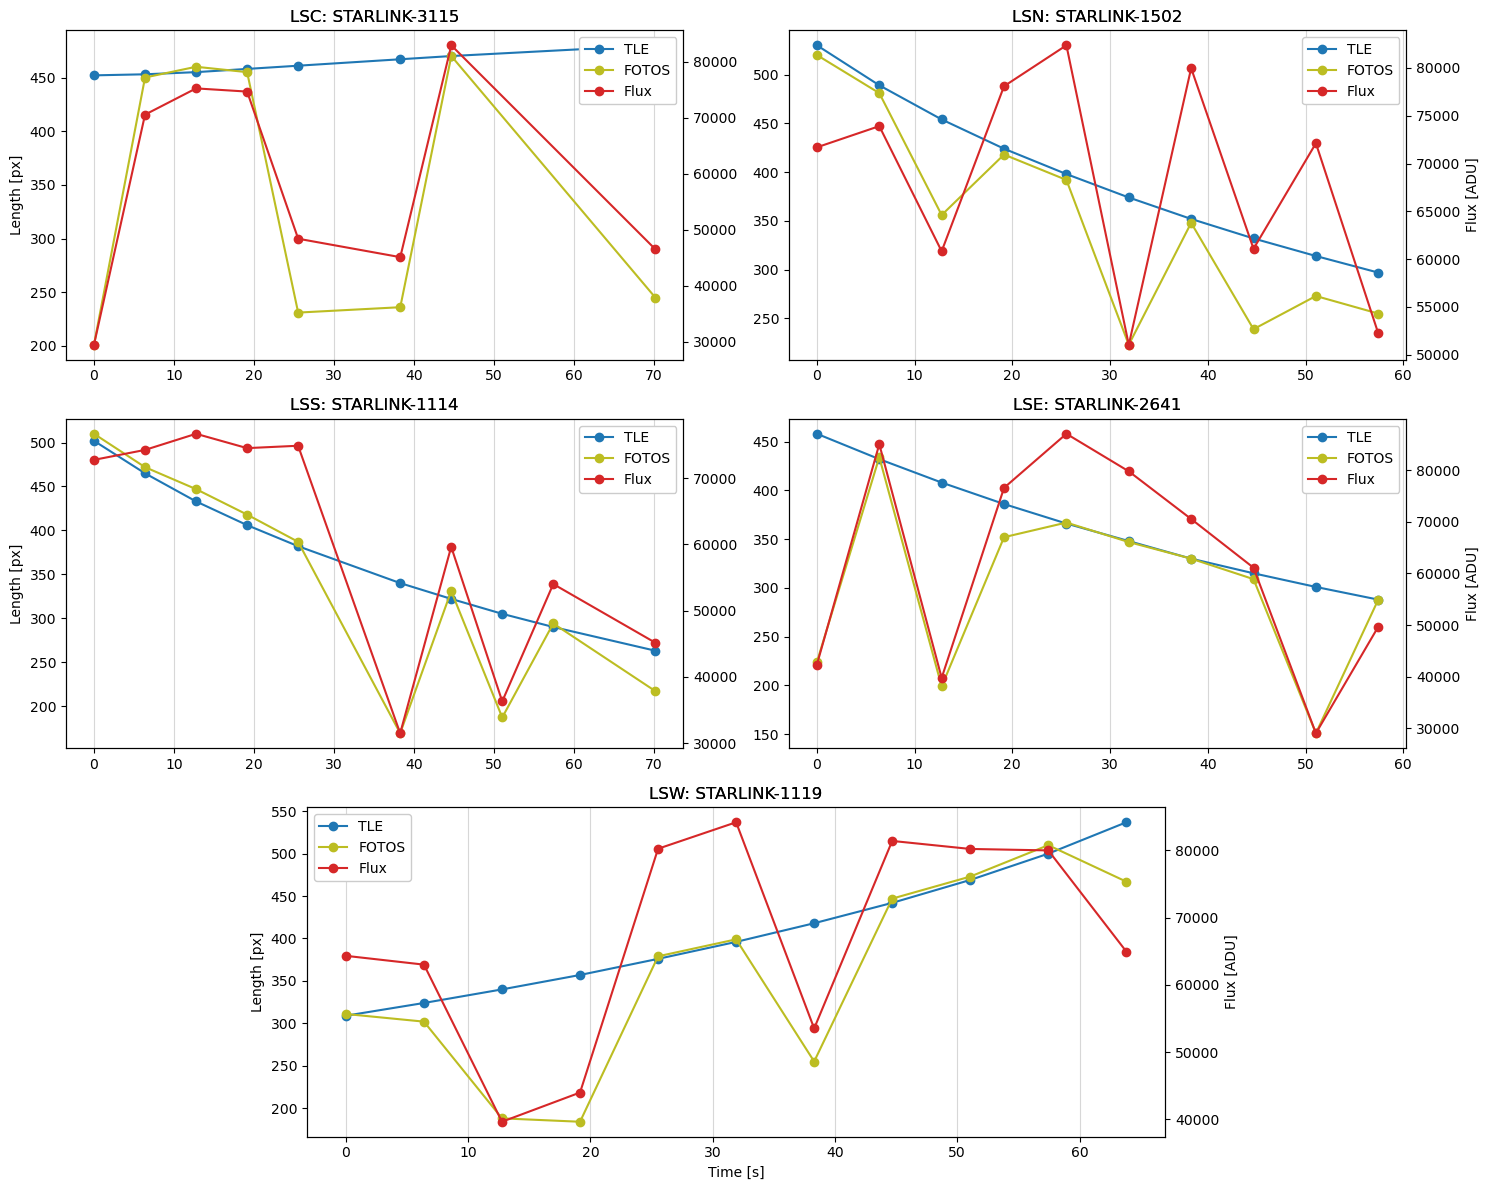

In [15]:
length_flux_time()

### Create subset of time sequences such that tracklet length is sufficiently long

- Have different quality flags i.e. 90% of length, 95%, within 1% etc etc
- Ensure time sequence has a minimum of 5 data points 
- Let's say tracklet can exceed up to 5 LSTSEQs, as long as within ~1 minute 

In [16]:
def subset_length():
    
    camids = ['LSC','LSN','LSS','LSE','LSW']
    
    for camid in camids:
        
        subset = {}
        data = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
        
        for lstseq in data.keys():
            
            if len(data[lstseq]) < 3:
                continue
                
            sats = list(data[lstseq])[2:]
            for sat in sats:
                tle_len = data[lstseq][sat]['TLE']['length']
                fot_len = data[lstseq][sat]['FOTOS']['length']
                
                if tle_len > fot_len:
                    
                    if fot_len/tle_len >= 0.99:
                        flag = 'green'
                    elif fot_len/tle_len >= 0.95:
                        flag = 'blue'
                    elif fot_len/tle_len >= 0.90:
                        flag = 'orange'
                    else:
                        continue
                        
                if tle_len < fot_len:
                    
                    if tle_len/fot_len >= 0.99:
                        flag = 'green'
                    elif tle_len/fot_len >= 0.95:
                        flag = 'blue'
                    elif tle_len/fot_len >= 0.90:
                        flag = 'orange'
                    else:
                        continue
                    
                JD0 = data[lstseq]['JD0']
                JD1 = data[lstseq]['JD1']
                tle = data[lstseq][sat]['TLE']
                name = data[lstseq][sat]['name']
                vmag = data[lstseq][sat]['vmag']
                popt = data[lstseq][sat]['popt']
                fotos = data[lstseq][sat]['FOTOS']
                sigma_B = data[lstseq][sat]['sigma_B']

                if lstseq not in subset.keys():
                    subset[lstseq] = {'JD0':JD0, 'JD1':JD1, sat:{}}

                subset[lstseq][sat] = {
                    'flag':flag, 'name':name, 'vmag':vmag, 'sigma_B':sigma_B, 
                    'popt':popt, 'FOTOS':fotos, 'TLE':tle}
                    
        pickle.dump(subset, open(f'subsets/length_subset_{camid}.p', 'wb'))
                

In [17]:
subset_length()

In [18]:
test = pd.read_pickle('subsets/length_subset_LSC.p')
test['48506281']

{'JD0': 2459876.517563686,
 'JD1': 2459876.517637563,
 '51802U': {'flag': 'orange',
  'name': 'STARLINK-3557',
  'vmag': 4.914539916491705,
  'sigma_B': 0.01918509980913455,
  'popt': 17.096737393992413,
  'FOTOS': {'x': [2749, 2480], 'y': [689, 1031], 'length': 435},
  'TLE': {'x': [2788.9656712227597, 2496.125746882283],
   'y': [643.1543476070113, 1014.3619494012302],
   'length': 473}}}

In [19]:
def subset_length_time():
    
    camids = ['LSC','LSN','LSS','LSE','LSW']
    
    for camid in camids:
        
        subset = {}
        data = pd.read_pickle(f'subsets/length_subset_{camid}.p')
        
        for i, lstseq in enumerate(data.keys(), start=1):
            JD0 = data[lstseq]['JD0']
            sats = list(data[lstseq])[2:]
            for sat in sats:
                if sat not in subset.keys():
                    subset[sat] = {}
                flag = data[lstseq][sat]['flag']
                subset[sat][f'JD{i}'] = {'JD0':JD0, 'lstseq':lstseq, 'flag':flag}
        
        subset_reduced = {}
        for sat in subset.keys():
            if len(subset[sat]) < 5:
                continue
            jds = subset[sat].keys()
            flags = []
            curlstseqs = []
            for jd in jds:
                flags.append(subset[sat][jd]['flag'])
                curlstseqs.append(int(subset[sat][jd]['lstseq']))
                
            # Check if each LSTSEQ in the list is within 5 digits of the previous one 
            keep = True
            for i in range(1, len(curlstseqs)):
                if abs(curlstseqs[i] - curlstseqs[i-1]) >= 5:
                    keep = False
                    
            if keep:
                if sat not in subset_reduced.keys():
                    subset_reduced[sat] = {}
                subset_reduced[sat]['lstseqs'] = curlstseqs
                subset_reduced[sat]['flags'] = flags
                
                
        pickle.dump(subset_reduced, open(f'subsets/time_subset_{camid}.p', 'wb'))
            

In [20]:
subset_length_time()

In [21]:
test = pd.read_pickle('subsets/time_subset_LSC.p')
test['51802U']

{'lstseqs': [48506281, 48506282, 48506284, 48506285, 48506287, 48506288],
 'flags': ['orange', 'green', 'green', 'green', 'green', 'blue']}

In [22]:
len(test)

7

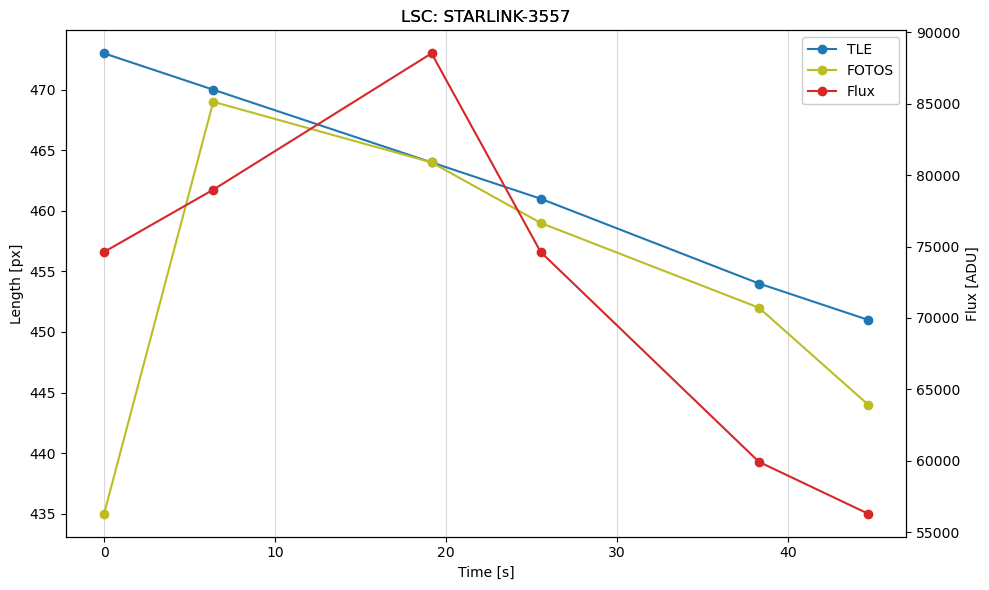

In [23]:
# TEST

camid = 'LSC'
satnum = '51802U'

vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

JDs = []
tle_length = []
fot_length = []
flux = []

for lstseq in subset[satnum]['lstseqs']:
    curlstseq = str(lstseq)
    JDs.append(vmags[curlstseq]['JD0'])
    tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
    fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
    flux.append(vmags[curlstseq][satnum]['flux']) 
sat = vmags[curlstseq][satnum]['name']

times = Time(JDs, format='jd')
seconds_per_day = 86400
elapsed_time = ((times - times[0]) * seconds_per_day).value

fig, ax = plt.subplots(1, 1, figsize=[10,6])
a = ax.plot(elapsed_time, tle_length, '-o', c='C0', label='TLE')
b = ax.plot(elapsed_time, fot_length, '-o', c='C8', label='FOTOS')
ax.set_title(f'{camid}: {sat}')
ax.grid(True, axis='x', alpha=0.5)

twin = ax.twinx()
c = twin.plot(elapsed_time, flux, '-o', c='C3', label='Flux')
twin.set_title(f'{camid}: {sat}')

curves = a + b + c
labels = [curve.get_label() for curve in curves]
twin.legend(curves, labels, facecolor='w', framealpha=1)

ax.set_ylabel('Length [px]')
ax.set_xlabel('Time [s]')
twin.set_ylabel('Flux [ADU]') 

plt.tight_layout()
plt.show()

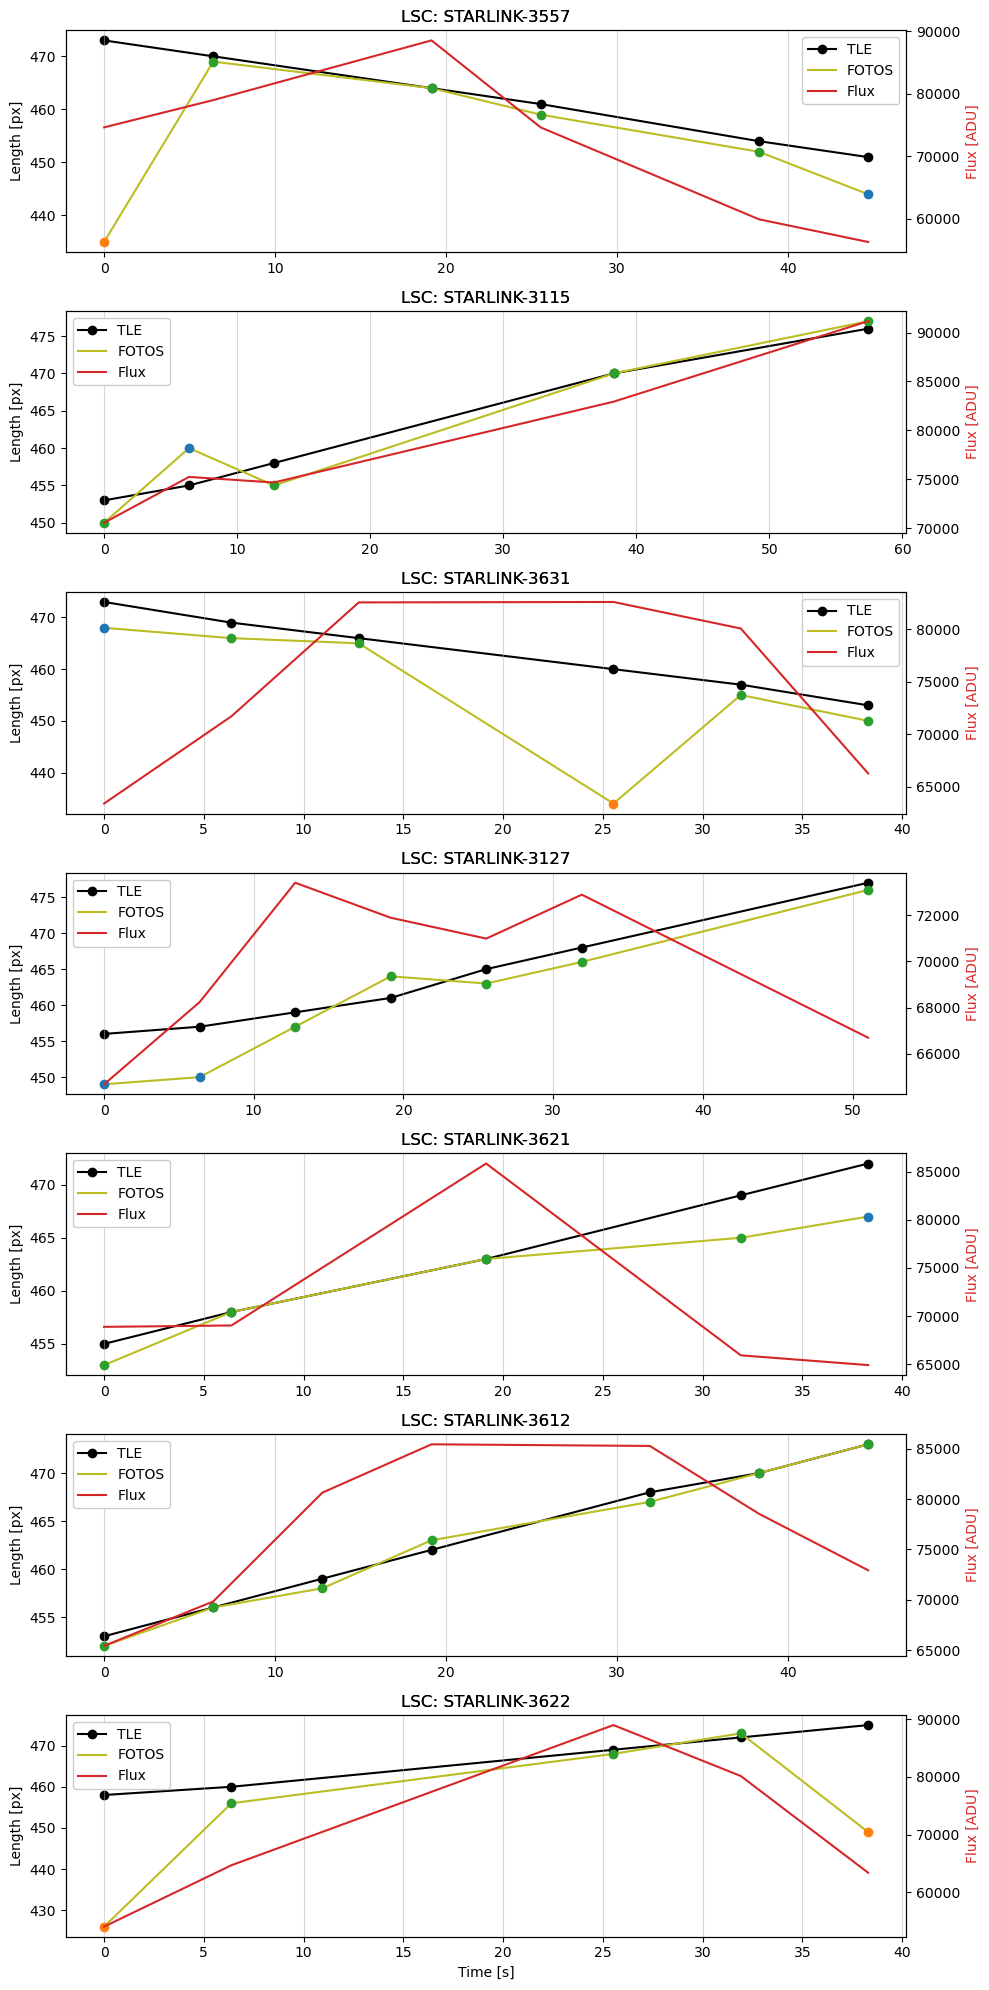

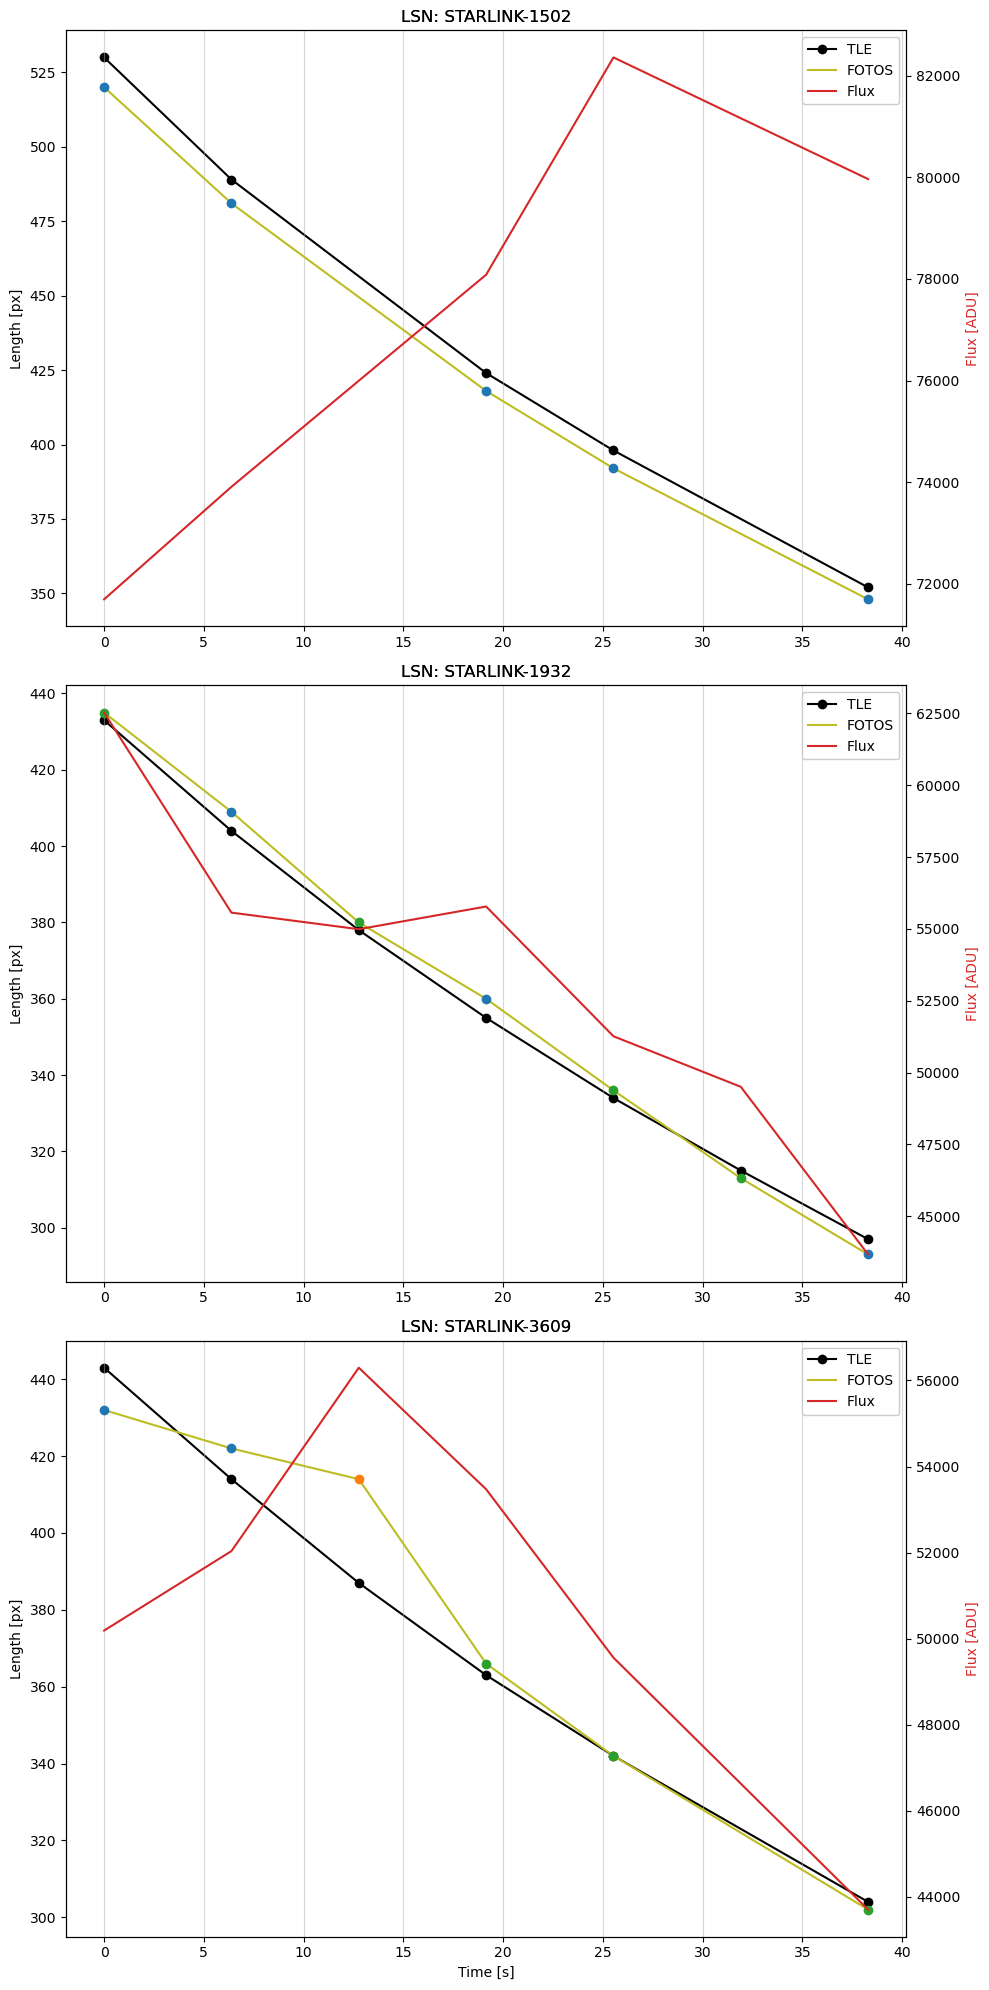

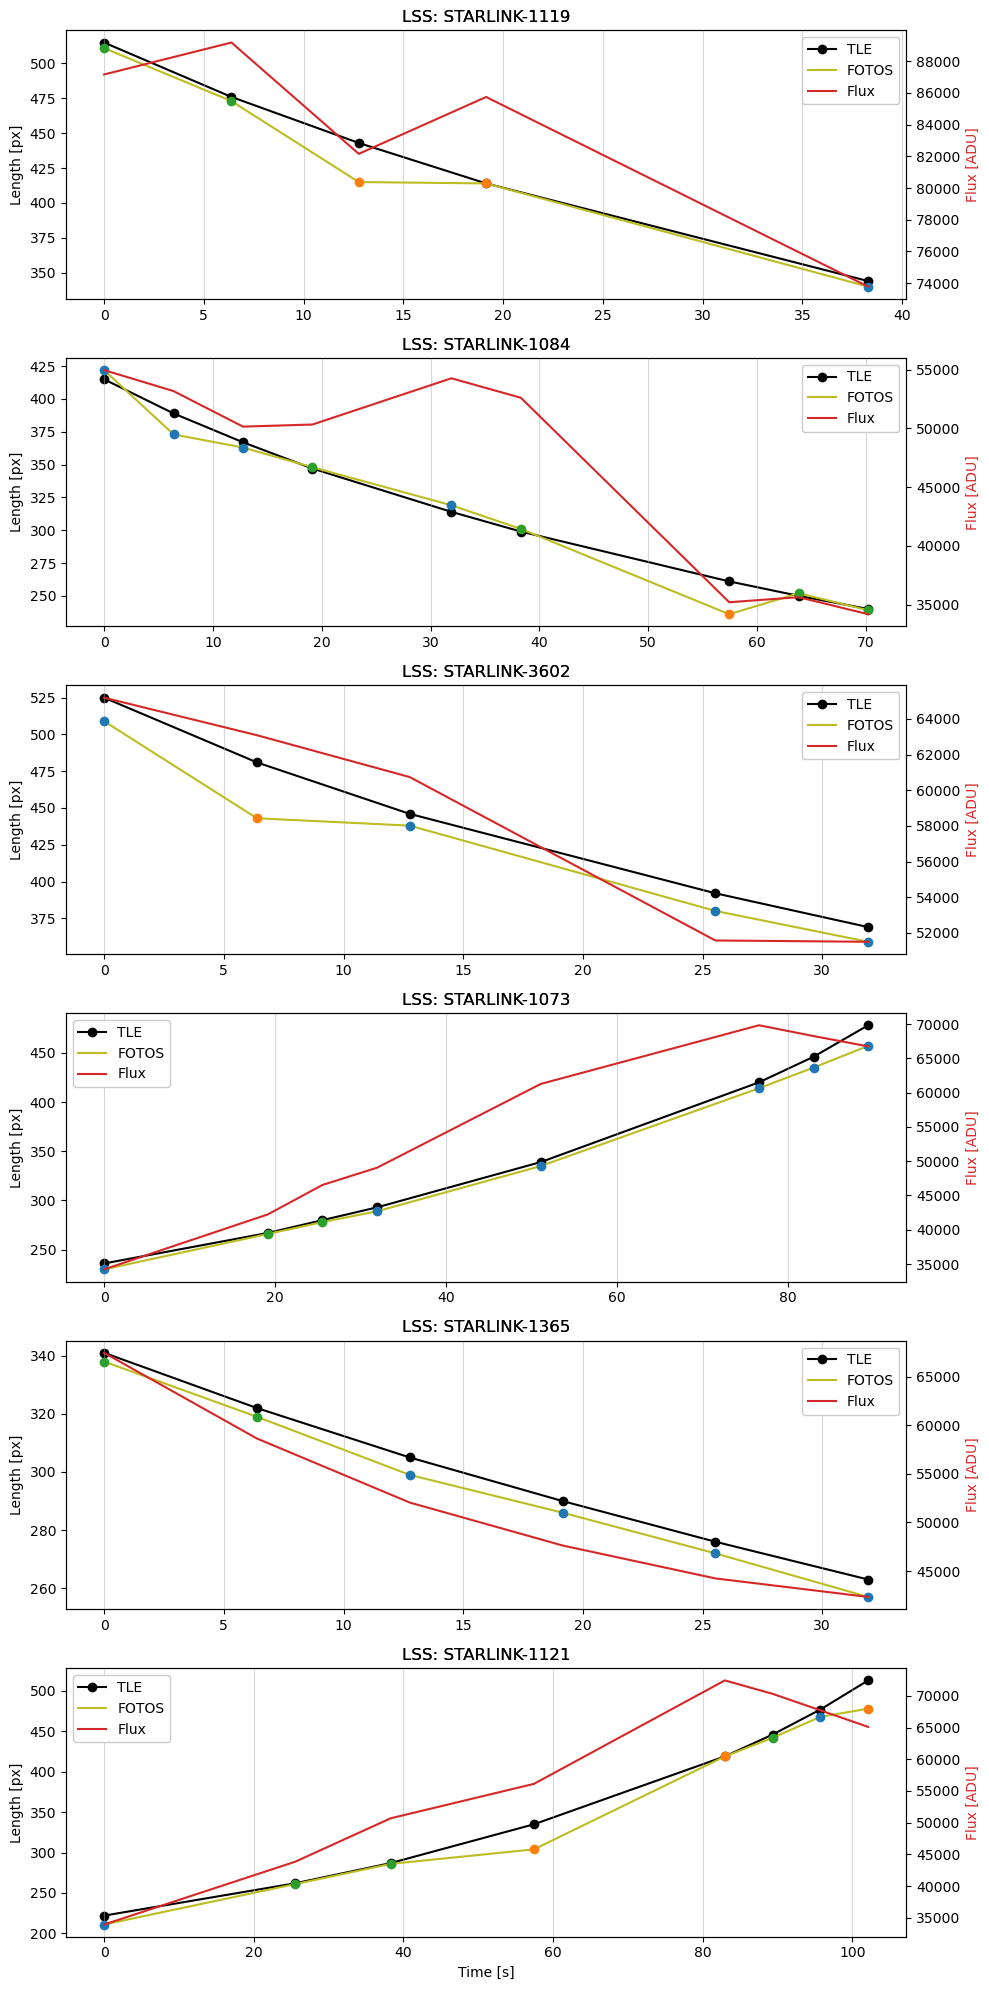

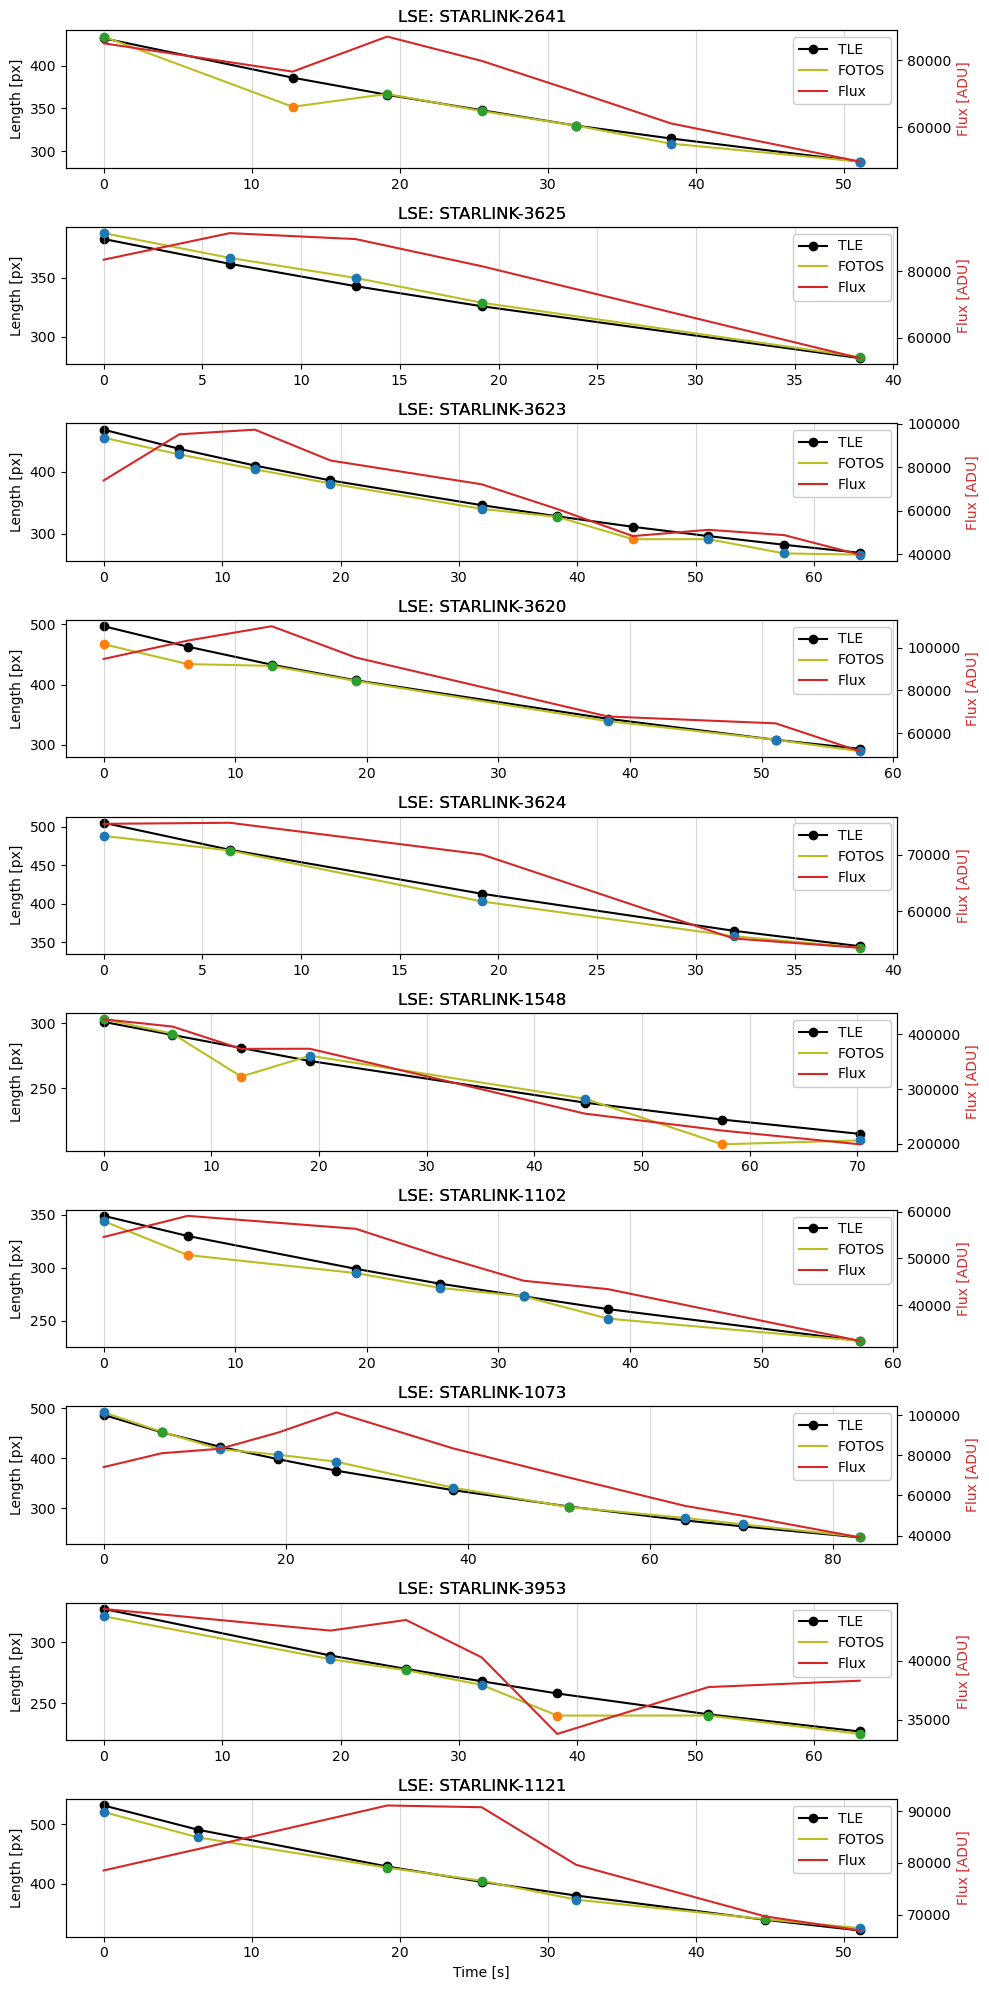

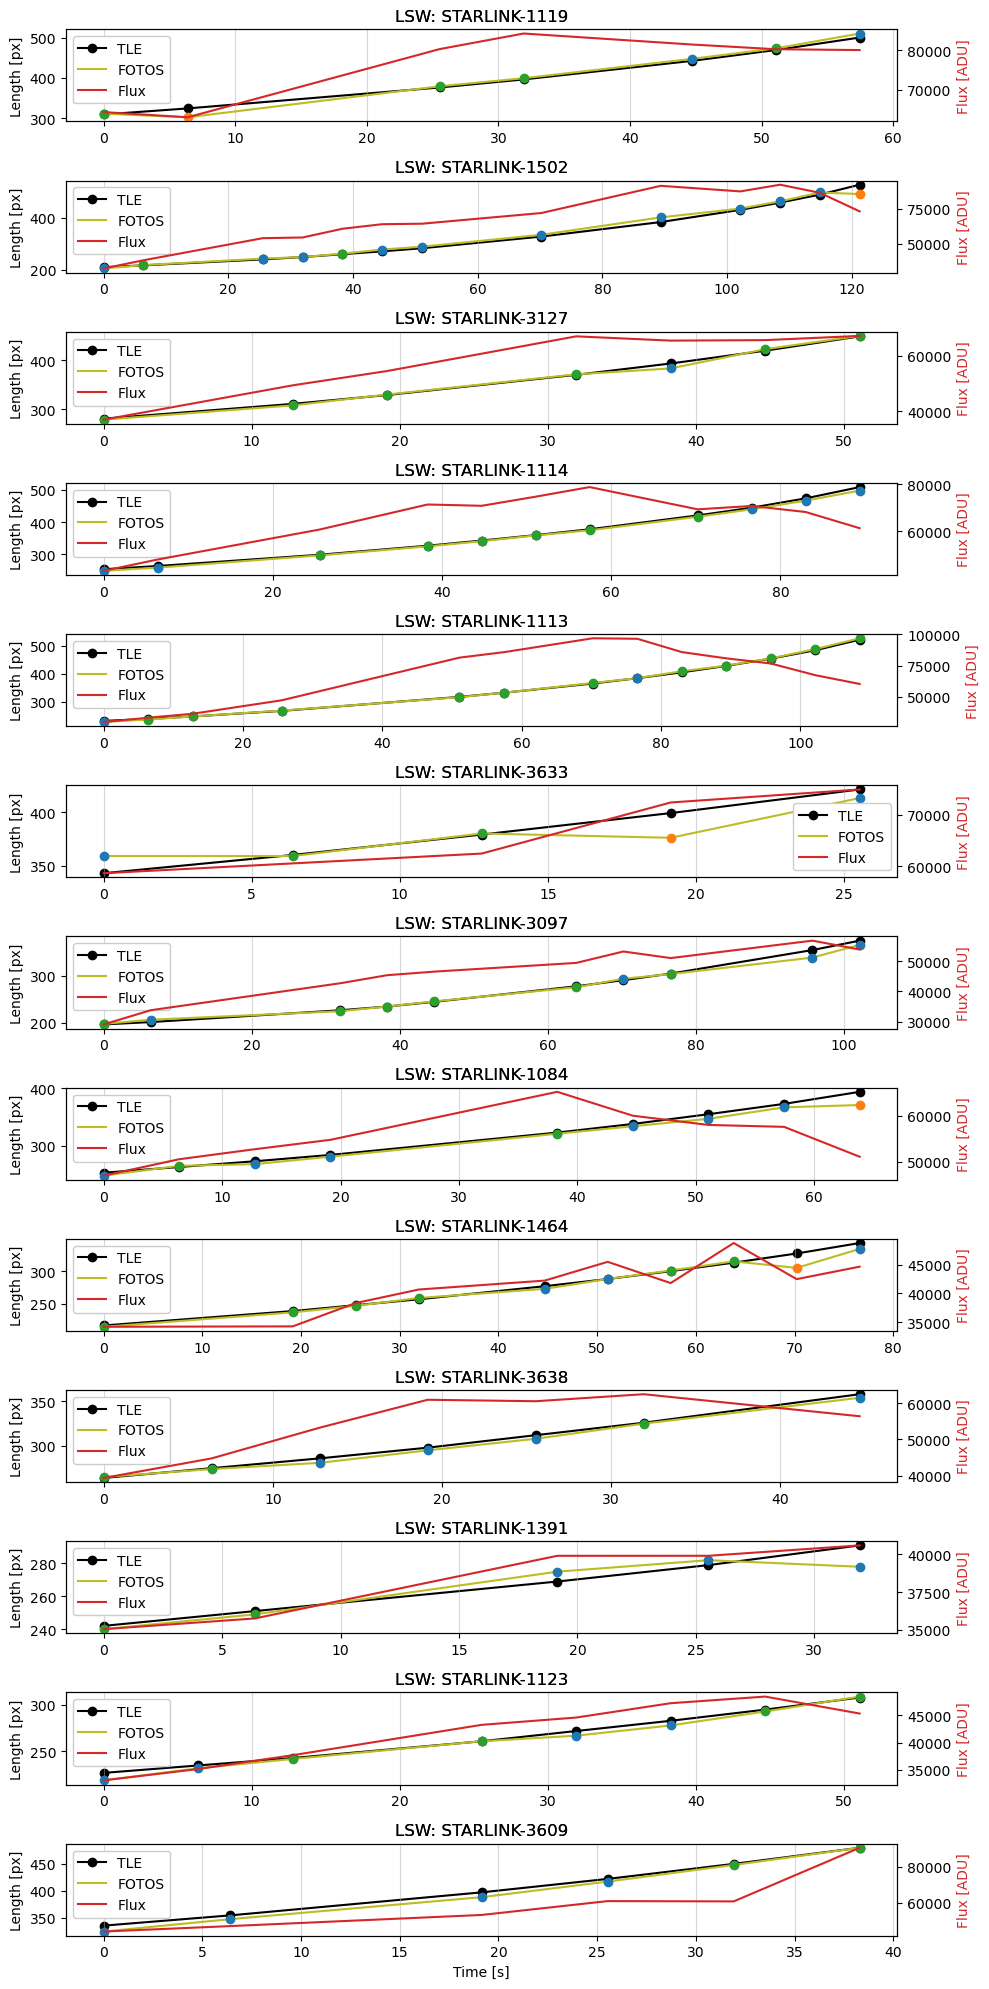

In [24]:
camids = ['LSC','LSN','LSS','LSE','LSW']

for camid in camids:
    vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
    subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

    n = len(subset)
    fig, axs = plt.subplots(n, figsize=[10,20])

    for i, satnum in enumerate(subset.keys()):

        JDs = []
        tle_length = []
        fot_length = []
        flux = []
        flags = subset[satnum]['flags']

        for lstseq in subset[satnum]['lstseqs']:
            curlstseq = str(lstseq)
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
            flux.append(vmags[curlstseq][satnum]['flux']) 
        sat = vmags[curlstseq][satnum]['name']

        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * seconds_per_day).value

        a = axs[i].plot(elapsed_time, tle_length, '-o', c='k', label='TLE', zorder=1)
        b = axs[i].plot(elapsed_time, fot_length, c='C8', label='FOTOS', zorder=2)
        axs[i].set_title(f'{camid}: {sat}')
        axs[i].grid(True, axis='x', alpha=0.5)
        axs[i].set_ylabel('Length [px]')
        
        for j in range(len(flags)):
            if flags[j] == 'green':
                axs[i].scatter(elapsed_time[j], fot_length[j], c='C2', zorder=3)
            if flags[j] == 'blue':
                axs[i].scatter(elapsed_time[j], fot_length[j], c='C0', zorder=3)
            if flags[j] == 'orange':
                axs[i].scatter(elapsed_time[j], fot_length[j], c='C1', zorder=3)

        twin = axs[i].twinx()
        c = twin.plot(elapsed_time, flux, c='C3', label='Flux')
        twin.set_ylabel('Flux [ADU]') 
        twin.yaxis.label.set_color('C3')
        #twin.spines['right'].set_edgecolor('C3')
        #twin.tick_params(axis='y', colors='C3')
        twin.set_title(f'{camid}: {sat}')

        curves = a + b + c
        labels = [curve.get_label() for curve in curves]
        axs[i].legend(curves, labels, facecolor='w', framealpha=1)

    axs[i].set_xlabel('Time [s]')
    plt.tight_layout()
    #plt.savefig(f'subset_{camid}.png', facecolor='w', bbox_inches='tight', dpi=300)
    

## Now apply a scaling factor to the length such that fluxes can be scaled ( i.e. 'corrected' )

In [5]:
camids = ['LSC','LSN','LSS','LSE','LSW']
samples = 0
for camid in camids:
    subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')
    samples += len(subset)
print(samples)

39


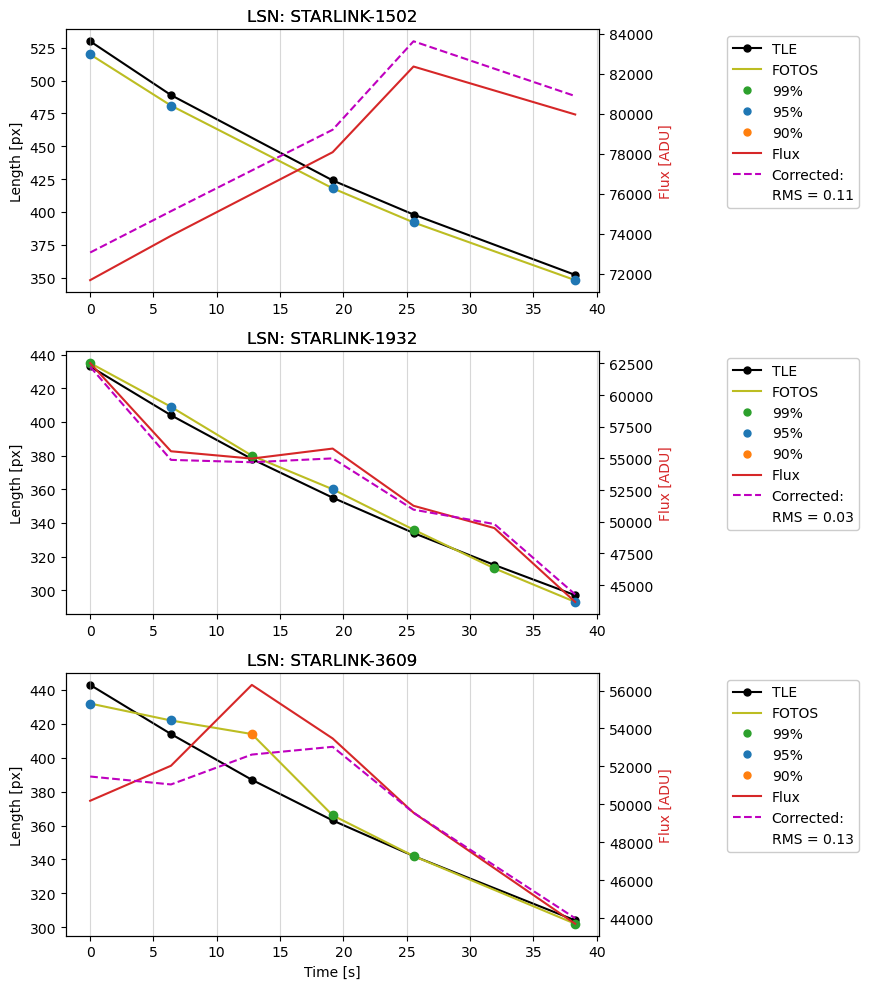

In [27]:
camid = 'LSN'

vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

n = len(subset)
fig, axs = plt.subplots(n, figsize=[10,10])

x = plt.plot([], [], markersize=5, marker='o', c='C2', ls='None', label='99%')
y = plt.plot([], [], markersize=5, marker='o', c='C0', ls='None', label='95%')
z = plt.plot([], [], markersize=5, marker='o', c='C1', ls='None', label='90%')

for i, satnum in enumerate(subset.keys()):

    JDs = []
    tle_length = []
    fot_length = []
    fluxes = []
    flags = subset[satnum]['flags']

    for lstseq in subset[satnum]['lstseqs']:
        curlstseq = str(lstseq)
        JDs.append(vmags[curlstseq]['JD0'])
        tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
        fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        fluxes.append(vmags[curlstseq][satnum]['flux']) 
    sat = vmags[curlstseq][satnum]['name']
    
    
    scaled_flux = []
    for (flux, tle_len, fot_len) in zip(fluxes, tle_length, fot_length):
        factor = 1/(fot_len / tle_len)
        f = flux*factor
        scaled_flux.append(f)
        
    # Compute the residuals
    residuals = np.array(fluxes) - np.array(scaled_flux)

    # Compute the RMS of the residuals
    rms = np.sqrt(np.mean(residuals**2))

    # Normalize the RMS to the range of the data (but to the fluxes or the scaled fluxes?)
    y_range = max(fluxes) - min(fluxes)
    normalized_rms = rms / y_range

    times = Time(JDs, format='jd')
    seconds_per_day = 86400
    elapsed_time = ((times - times[0]) * seconds_per_day).value

    a = axs[i].plot(elapsed_time, tle_length, '-o', markersize=5, c='k', label='TLE', zorder=1)
    b = axs[i].plot(elapsed_time, fot_length, c='C8', label='FOTOS', zorder=2)
    axs[i].set_title(f'{camid}: {sat}')
    axs[i].grid(True, axis='x', alpha=0.5)
    axs[i].set_ylabel('Length [px]')

    for j in range(len(flags)):
        if flags[j] == 'green':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C2', zorder=3, label='99%')
        if flags[j] == 'blue':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C0', zorder=3, label='95%')
        if flags[j] == 'orange':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C1', zorder=3, label='90%')

    twin = axs[i].twinx()
    c = twin.plot(elapsed_time, fluxes, c='C3', label='Flux')
    d = twin.plot(elapsed_time, scaled_flux, c='m', ls='--', label='Corrected:')
    twin.set_ylabel('Flux [ADU]') 
    twin.yaxis.label.set_color('C3')
    #twin.spines['right'].set_edgecolor('C3')
    #twin.tick_params(axis='y', colors='C3')
    twin.set_title(f'{camid}: {sat}')
    
    res = plt.plot([], [], ls='None', label=f'RMS = {round(normalized_rms,2)}')
    curves = a + b + x + y + z + c + d + res
    labels = [curve.get_label() for curve in curves]
    axs[i].legend(curves, labels, facecolor='w', framealpha=1, bbox_to_anchor=(1.5, 1.0))
    
axs[i].set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

## Let's record all the RMS values

The standard deviation represents the spread or dispersion of the data, rather than specifically addressing the uncertainty or error associated with the RMS values.

If you want to quantify the uncertainty of your RMS values directly, you could consider using the standard error of the mean (SEM) instead. The SEM takes into account the sample size and provides an estimate of the uncertainty in the mean value. It is calculated by dividing the standard deviation by the square root of the sample size. **The SEM would give you an estimate of the uncertainty associated with the mean RMS value of your data.**

If you are more interested in summarizing the spread of the individual RMS values rather than the uncertainty in the mean, then using the standard deviation might be more appropriate.


The standard deviation captures the spread or dispersion of the RMS values, which can reflect the variability or deviation from the expected flux values across your observations. **By using the standard deviation, you would obtain a single value that summarizes the magnitude of the differences between the expected and scaled flux values across your dataset.**

The SEM is typically used when estimating the uncertainty of the mean value, which is not the focus of your analysis. Since you are interested in quantifying the uncertainty of the individual RMS values, the SEM might not provide a meaningful measure in this context.

Taking the mean of the RMS list, on the other hand, would provide you with the average level of the differences between the expected and scaled flux values. While this can be useful information, it does not directly address the spread or variability of the RMS values, which is often crucial in characterizing uncertainty.

**Based on my specific context, using the standard deviation of the RMS values would be the most appropriate way to characterize the uncertainty!**

In [26]:
rms_list = []
camids = ['LSC','LSN','LSS','LSE','LSW']
for camid in camids:
    vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
    subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

    for i, satnum in enumerate(subset.keys()):

        JDs = []
        tle_length = []
        fot_length = []
        fluxes = []
        flags = subset[satnum]['flags']

        for lstseq in subset[satnum]['lstseqs']:
            curlstseq = str(lstseq)
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
            fluxes.append(vmags[curlstseq][satnum]['flux']) 
        sat = vmags[curlstseq][satnum]['name']


        scaled_flux = []
        for (flux, tle_len, fot_len) in zip(fluxes, tle_length, fot_length):
            factor = 1/(fot_len / tle_len)
            f = flux*factor
            scaled_flux.append(f)

        # RMS
        residuals = np.array(fluxes) - np.array(scaled_flux)
        rms = np.sqrt(np.mean(residuals**2))
        y_range = max(fluxes) - min(fluxes)
        normalized_rms = rms / y_range
        rms_list.append(normalized_rms)

print(f'For {len(rms_list)} RMS calculations:')
print(f'Mean = {round(np.mean(rms_list),4)}')
print(f'Standard deviation = {round(np.std(rms_list),4)}')
print(f'Standard error of the mean = {round(np.std(rms_list)/np.sqrt(len(rms_list)),4)}')

For 39 RMS calculations:
Mean = 0.0659
Standard deviation = 0.0471
Standard error of the mean = 0.0075


### Note about normalizing the RMS: 

#### Another common approach is to normalize the RMS by dividing it by the range or standard deviation of the expected flux values. This normalization accounts for the variability in the expected flux values and allows for more meaningful comparisons.

#### Which one to use? ChatGPT's answer:

In the context of your work, where you are comparing the RMS values between different observations and assessing the error relative to the expected flux values, normalizing the RMS by dividing it by the range of the expected flux values seems appropriate.

Here's the rationale behind using the range normalization in your specific case:

Range normalization considers the overall span of the expected flux values, which can be important when comparing the RMS values across different observations. It accounts for the variability in the expected flux values and provides a measure of the relative error within that range.

In your scenario, you are interested in quantifying the error between the expected and scaled flux values. By normalizing the RMS with the range of the expected flux values, you express the RMS value relative to the scale of the flux values, providing a normalized error metric.

In [27]:
residuals = np.array(fluxes) - np.array(scaled_flux)
rms = np.sqrt(np.mean(residuals**2))

y_range = max(fluxes) - min(fluxes)
print('My way:', rms/y_range)

print('Other way: ', rms/np.std(fluxes))

# ASK REMKO ABOUT   y_range = max(fluxes) - min(fluxes)   -> should it be fluxes here?

My way: 0.019997096346168843
Other way:  0.060868764100656766


# Okay, so:

## We have a flux uncertainty: sigma_F = std(RMS) 
## We have a conversion factor measurement: sigma_B = sqrt(pcov)
## Now we just need to propagate the errors:

$m = -2.5 \log_{10}(F) + B$

$\sigma_m = \sqrt{\left(\frac{\delta m}{\delta F} \cdot \sigma_F \right)^2 + \left(\frac{\delta m}{\delta B} \cdot \sigma_B \right)^2}$

$\frac{\delta m}{\delta F} = -\frac{2.5}{F \ln{10}}$

$\frac{\delta m}{\delta B} = 1$

$\sigma_m = \sqrt{\left(-\frac{2.5}{F \ln{10}} \cdot \sigma_F \right)^2 + \left(\sigma_B \right)^2}$

In [28]:
camid = 'LSC'
vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')

flux = vmags['48506281']['51802U']['flux']
sigma_B = vmags['48506281']['51802U']['sigma_B']
sigma_F = np.std(rms_list)

def error_prop(flux, sigma_F, sigma_B):
    dm_dF = -2.5/(flux*np.log(10))
    dm_dB = 1
    return np.sqrt((dm_dF*sigma_F)**2 + (dm_dB*sigma_B)**2)

sigma_m = error_prop(flux, sigma_F, sigma_B)

satname = vmags['48506281']['51802U']['name']
satvmag = vmags['48506281']['51802U']['vmag']
print(r'{}: m = {} +/- {}'.format(satname, round(satvmag,3), round(sigma_m,3)))

STARLINK-3557: m = 4.915 +/- 0.019


In [29]:
def error_prop(flux, sigma_F, sigma_B):
    dm_dF = -2.5/(flux*np.log(10))
    dm_dB = 1
    return np.sqrt((dm_dF*sigma_F)**2 + (dm_dB*sigma_B)**2)


def compute_vmag_errors(sigma_F):
    
    all_vmags  = []
    all_deltas = []
    camids = ['LSC','LSN','LSS','LSE','LSW']
    
    for camid in camids:
        vmag_errors = {}
        vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
        
        for lstseq in vmags.keys():
            vmag_errors[lstseq] = {}
            for sat in list(vmags[lstseq])[2:]:
                vmag = vmags[lstseq][sat]['vmag']
                flux = vmags[lstseq][sat]['flux']
                sigma_B = vmags[lstseq][sat]['sigma_B']
                delta = error_prop(flux, sigma_F, sigma_B)
                vmag_errors[lstseq][sat] = {'vmag':vmag, 'delta':delta}
                
                all_vmags.append(vmag)
                all_deltas.append(delta)
                
        pickle.dump(vmag_errors, open(f'vmag_errors_{camid}.p', 'wb'))
        
    return all_vmags, all_deltas

In [30]:
all_vmags, all_deltas = compute_vmag_errors(sigma_F)

# MISTAKE! shouldn't be doing RMS between flux and corrected flux
## Instead, make a linear fit and subtract it (since trend looks pretty linear)
## Only do scaled flux to measurments that are below that 90% range
## Note: should indicate if green, blue, orange points are above / below

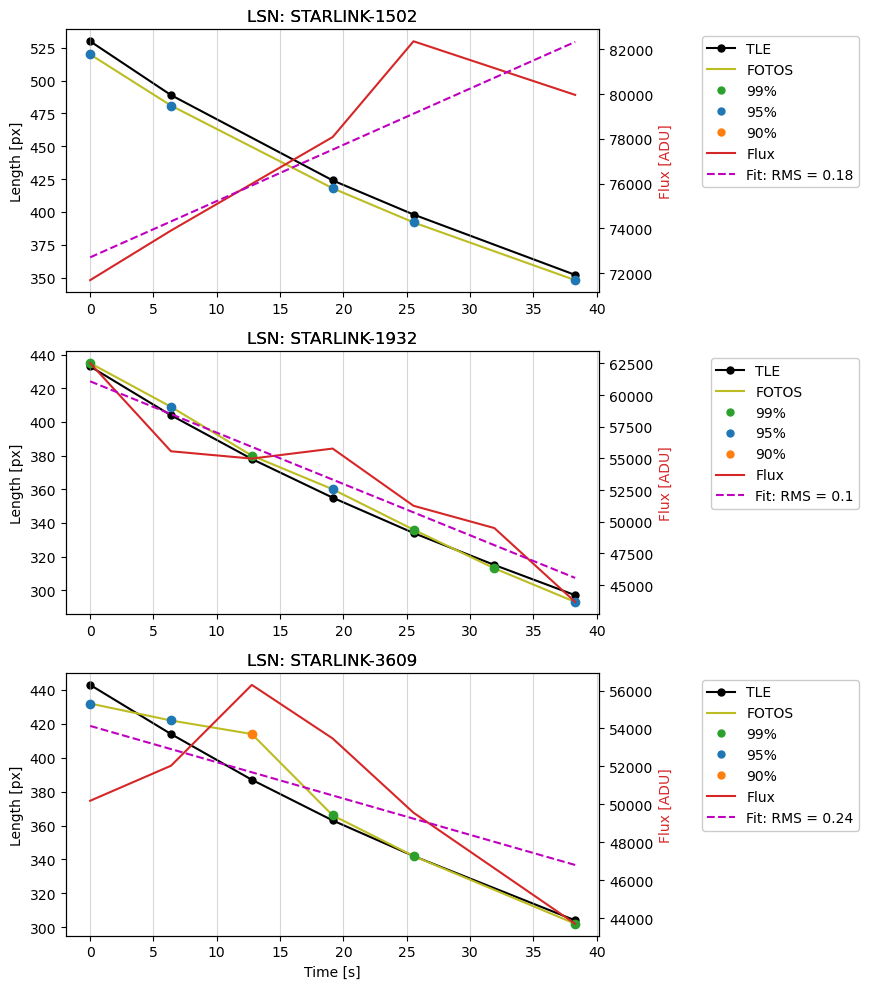

In [51]:
camid = 'LSN'

vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

n = len(subset)
fig, axs = plt.subplots(n, figsize=[10,10])

x = plt.plot([], [], markersize=5, marker='o', c='C2', ls='None', label='99%')
y = plt.plot([], [], markersize=5, marker='o', c='C0', ls='None', label='95%')
z = plt.plot([], [], markersize=5, marker='o', c='C1', ls='None', label='90%')

for i, satnum in enumerate(subset.keys()):

    JDs = []
    tle_length = []
    fot_length = []
    fluxes = []
    flags = subset[satnum]['flags']

    for lstseq in subset[satnum]['lstseqs']:
        curlstseq = str(lstseq)
        JDs.append(vmags[curlstseq]['JD0'])
        tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
        fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        fluxes.append(vmags[curlstseq][satnum]['flux']) 
    sat = vmags[curlstseq][satnum]['name']
    
    
    times = Time(JDs, format='jd')
    seconds_per_day = 86400
    elapsed_time = ((times - times[0]) * seconds_per_day).value
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, fluxes)
    line = slope * elapsed_time + intercept
    residuals = fluxes - line
    rms = np.sqrt(np.mean(residuals**2))
    y_range = max(fluxes) - min(fluxes)
    normalized_rms = rms / y_range

    a = axs[i].plot(elapsed_time, tle_length, '-o', markersize=5, c='k', label='TLE', zorder=1)
    b = axs[i].plot(elapsed_time, fot_length, c='C8', label='FOTOS', zorder=2)
    axs[i].set_title(f'{camid}: {sat}')
    axs[i].grid(True, axis='x', alpha=0.5)
    axs[i].set_ylabel('Length [px]')

    for j in range(len(flags)):
        if flags[j] == 'green':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C2', zorder=3, label='99%')
        if flags[j] == 'blue':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C0', zorder=3, label='95%')
        if flags[j] == 'orange':
            axs[i].scatter(elapsed_time[j], fot_length[j], c='C1', zorder=3, label='90%')

    twin = axs[i].twinx()
    c = twin.plot(elapsed_time, fluxes, c='C3', label='Flux')
    d = twin.plot(elapsed_time, line, c='m', ls='--', label=f'Fit: RMS = {round(normalized_rms,2)}')
    twin.set_ylabel('Flux [ADU]') 
    twin.yaxis.label.set_color('C3')
    #twin.spines['right'].set_edgecolor('C3')
    #twin.tick_params(axis='y', colors='C3')
    twin.set_title(f'{camid}: {sat}')
    
    curves = a + b + x + y + z + c + d
    labels = [curve.get_label() for curve in curves]
    axs[i].legend(curves, labels, facecolor='w', framealpha=1, bbox_to_anchor=(1.5, 1.0))
    
axs[i].set_xlabel('Time [s]')
plt.tight_layout()
plt.show()

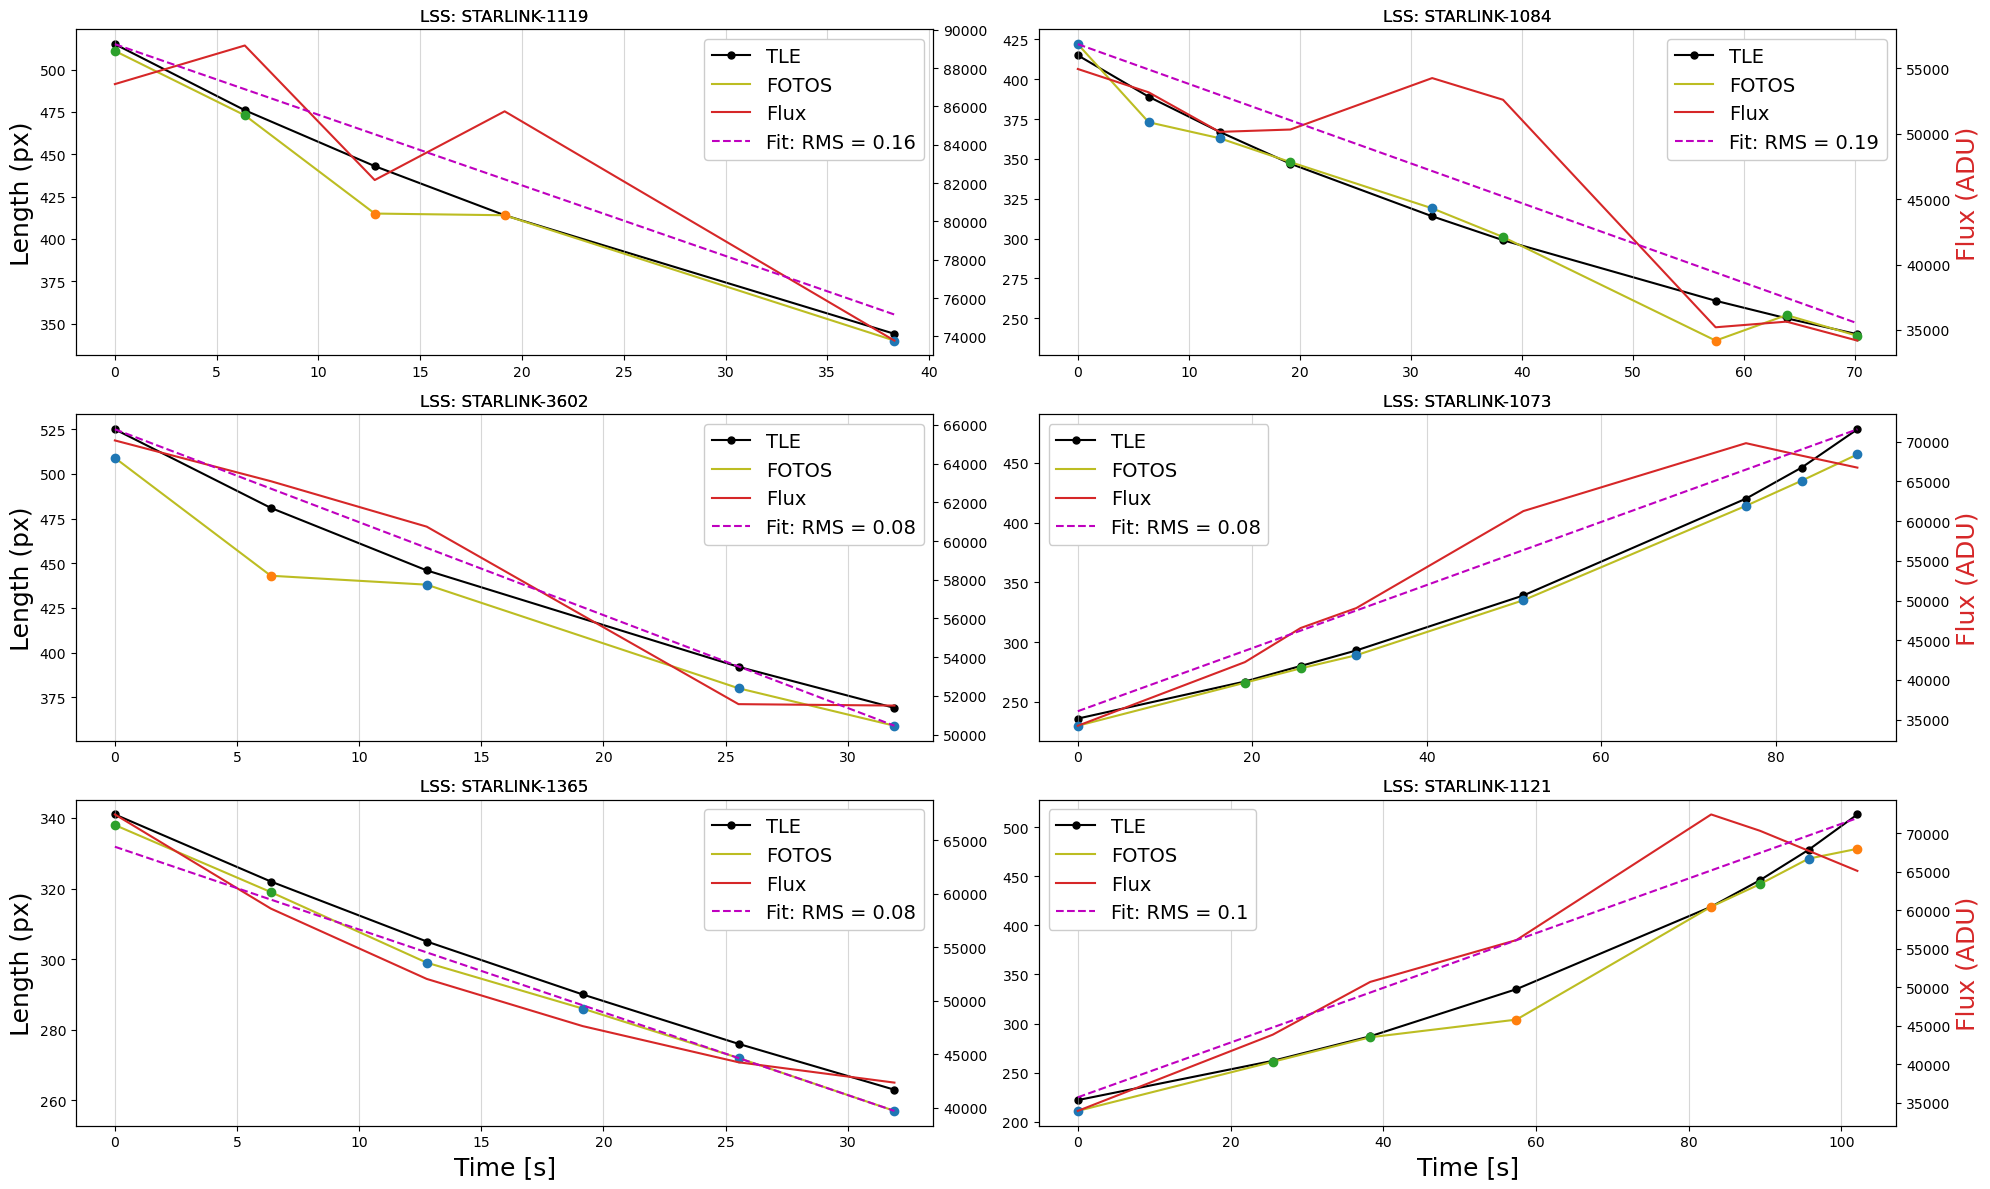

In [55]:
camid = 'LSS'

vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

fig, axs = plt.subplots(3, 2, figsize=[20,12])

# x = plt.plot([], [], markersize=5, marker='o', c='C2', ls='None', label='99%')
# y = plt.plot([], [], markersize=5, marker='o', c='C0', ls='None', label='95%')
# z = plt.plot([], [], markersize=5, marker='o', c='C1', ls='None', label='90%')

for i, (ax, satnum) in enumerate(zip(axs.flat, subset.keys()), start=1):

    JDs = []
    tle_length = []
    fot_length = []
    fluxes = []
    flags = subset[satnum]['flags']

    for lstseq in subset[satnum]['lstseqs']:
        curlstseq = str(lstseq)
        JDs.append(vmags[curlstseq]['JD0'])
        tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
        fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        fluxes.append(vmags[curlstseq][satnum]['flux']) 
    sat = vmags[curlstseq][satnum]['name']
    
    
    times = Time(JDs, format='jd')
    seconds_per_day = 86400
    elapsed_time = ((times - times[0]) * seconds_per_day).value
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, fluxes)
    line = slope * elapsed_time + intercept
    residuals = fluxes - line
    rms = np.sqrt(np.mean(residuals**2))
    y_range = max(fluxes) - min(fluxes)
    normalized_rms = rms / y_range


    a = ax.plot(elapsed_time, tle_length, '-o', markersize=5, c='k', label='TLE', zorder=1)
    b = ax.plot(elapsed_time, fot_length, c='C8', label='FOTOS', zorder=2)
    ax.set_title(f'{camid}: {sat}')
    ax.grid(True, axis='x', alpha=0.5)

    for j in range(len(flags)):
        if flags[j] == 'green':
            ax.scatter(elapsed_time[j], fot_length[j], c='C2', zorder=3, label='99%')
        if flags[j] == 'blue':
            ax.scatter(elapsed_time[j], fot_length[j], c='C0', zorder=3, label='95%')
        if flags[j] == 'orange':
            ax.scatter(elapsed_time[j], fot_length[j], c='C1', zorder=3, label='90%')

    twin = ax.twinx()
    c = twin.plot(elapsed_time, fluxes, c='C3', label='Flux')
    d = twin.plot(elapsed_time, line, c='m', ls='--', label=f'Fit: RMS = {round(normalized_rms,2)}')
    
    if (i==2) | (i==4) | (i==6) :
        twin.set_ylabel('Flux (ADU)', fontsize=18)
    else:
        ax.set_ylabel('Length (px)', fontsize=18)
        
    twin.yaxis.label.set_color('C3')
    #twin.spines['right'].set_edgecolor('C3')
    #twin.tick_params(axis='y', colors='C3')
    twin.set_title(f'{camid}: {sat}')
    
    curves = a + b + c + d
    labels = [curve.get_label() for curve in curves]
    ax.legend(curves, labels, facecolor='w', framealpha=1, fontsize=14)
    
axs.flat[-2].set_xlabel('Time [s]', fontsize=18)
axs.flat[-1].set_xlabel('Time [s]', fontsize=18)
plt.tight_layout()
plt.savefig(f'{datadir}images/colloq_plots/error_prop.png', dpi=300, bbox_inches='tight')
plt.show()

# THESIS PLOT

LSS: STARLINK-1073, RMS = 0.08


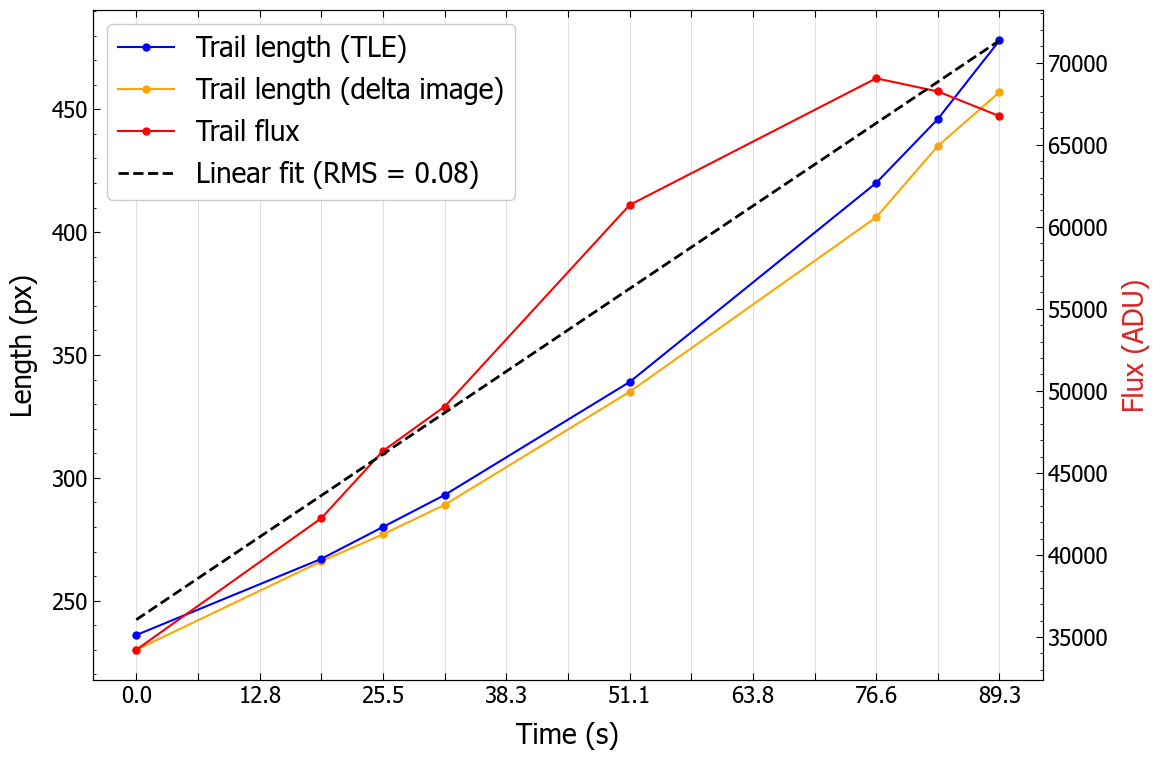

In [2]:
camid = 'LSS'

vmags = pd.read_pickle(f'{datadir}full_data/vmags_july/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['font.size'] = 20  

def plot_all():

    fig, axs = plt.subplots(3, 2, figsize=[20,12])

    # x = plt.plot([], [], markersize=5, marker='o', c='C2', ls='None', label='99%')
    # y = plt.plot([], [], markersize=5, marker='o', c='C0', ls='None', label='95%')
    # z = plt.plot([], [], markersize=5, marker='o', c='C1', ls='None', label='90%')

    for i, (ax, satnum) in enumerate(zip(axs.flat, subset.keys()), start=1):

        JDs = []
        tle_length = []
        fot_length = []
        fluxes = []
        flags = subset[satnum]['flags']

        for lstseq in subset[satnum]['lstseqs']:
            curlstseq = str(lstseq)
            JDs.append(vmags[curlstseq]['JD0'])
            tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
            fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
            fluxes.append(vmags[curlstseq][satnum]['flux']) 
        sat = vmags[curlstseq][satnum]['name']


        times = Time(JDs, format='jd')
        seconds_per_day = 86400
        elapsed_time = ((times - times[0]) * seconds_per_day).value

        # linear regression
        slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, fluxes)
        line = slope * elapsed_time + intercept
        residuals = fluxes - line
        rms = np.sqrt(np.mean(residuals**2))
        y_range = max(fluxes) - min(fluxes)
        normalized_rms = rms / y_range


        a = ax.plot(elapsed_time, tle_length, '-o', markersize=5, c='k', label='TLE', zorder=1)
        b = ax.plot(elapsed_time, fot_length, c='C8', label='FOTOS', zorder=2)
        ax.set_title(f'{camid}: {sat}')
        ax.grid(True, axis='x', alpha=0.5)

        for j in range(len(flags)):
            if flags[j] == 'green':
                ax.scatter(elapsed_time[j], fot_length[j], c='C2', zorder=3, label='99%')
            if flags[j] == 'blue':
                ax.scatter(elapsed_time[j], fot_length[j], c='C0', zorder=3, label='95%')
            if flags[j] == 'orange':
                ax.scatter(elapsed_time[j], fot_length[j], c='C1', zorder=3, label='90%')

        twin = ax.twinx()
        c = twin.plot(elapsed_time, fluxes, c='C3', label='Flux')
        d = twin.plot(elapsed_time, line, c='m', ls='--', label=f'Fit: RMS = {round(normalized_rms,2)}')

        if (i==2) | (i==4) | (i==6) :
            twin.set_ylabel('Flux (ADU)', fontsize=18)
        else:
            ax.set_ylabel('Length (px)', fontsize=18)

        twin.yaxis.label.set_color('C3')
        #twin.spines['right'].set_edgecolor('C3')
        #twin.tick_params(axis='y', colors='C3')
        twin.set_title(f'{camid}: {sat}')

        curves = a + b + c + d
        labels = [curve.get_label() for curve in curves]
        ax.legend(curves, labels, facecolor='w', framealpha=1, fontsize=14)

    axs.flat[-2].set_xlabel('Time [s]', fontsize=18)
    axs.flat[-1].set_xlabel('Time [s]', fontsize=18)
    plt.tight_layout()
    plt.savefig(f'{savedir}error_prop_example.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    
def plot_single():
    
    fig, ax = plt.subplots(1, 1, figsize=[12,8])
    
    satnums = list(subset)
    satnum = satnums[3]

    JDs = []
    fluxes = []
    tle_length = []
    fot_length = []
    flags = subset[satnum]['flags']

    for lstseq in subset[satnum]['lstseqs']:
        curlstseq = str(lstseq)
        JDs.append(vmags[curlstseq]['JD0'])
        tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
        fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        fluxes.append(vmags[curlstseq][satnum]['flux']) 
    sat = vmags[curlstseq][satnum]['name']
    
    times = Time(JDs, format='jd')
    seconds_per_day = 86400
    elapsed_time = ((times - times[0]) * seconds_per_day).value
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, fluxes)
    line = slope * elapsed_time + intercept
    residuals = fluxes - line
    rms = np.sqrt(np.mean(residuals**2))
    y_range = max(fluxes) - min(fluxes)
    normalized_rms = rms / y_range

    a = ax.plot(elapsed_time, tle_length, '-o', markersize=5, c='blue', label='Trail length (TLE)', zorder=2)
    b = ax.plot(elapsed_time, fot_length, '-o', markersize=5, c='orange', label='Trail length (delta image)', 
                zorder=1)
    #ax.set_title(f'{camid}: {sat}')
    ax.grid(True, axis='x', alpha=0.4, zorder=1)
    
    twin = ax.twinx()
    c = twin.plot(elapsed_time, fluxes, '-o', markersize=5, c='r', label='Trail flux', zorder=3)
    d = twin.plot(elapsed_time, line, c='k', ls='--', lw=2, label=f'Linear fit (RMS = {round(normalized_rms,2)})', 
                  zorder=3) 
    #RMS={round(normalized_rms,2)}

    twin.set_ylabel('Flux (ADU)', fontsize=20, labelpad=10)
    ax.set_ylabel('Length (px)', fontsize=20, labelpad=10)

    twin.yaxis.label.set_color('C3')
    #twin.spines['right'].set_edgecolor('C3')
    #twin.tick_params(axis='y', colors='C3')

    curves = a + b + c + d
    labels = [curve.get_label() for curve in curves]
    ax.legend(curves, labels, facecolor='w', framealpha=1, fontsize=20)
    ax.set_xlabel('Time (s)', fontsize=20, labelpad=10)

    tick_step = 6.382986903190613
    tick_positions = np.arange(elapsed_time[0], elapsed_time[-1], tick_step)
    tick_positions = np.append(tick_positions, elapsed_time[-1]) 
    #tick_labels = [f'{t:.2f}' for t in tick_positions]
    tick_labels = [f'{t:.1f}' if i % 2 == 0 else '' for i, t in enumerate(tick_positions)]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    
    ax.yaxis.get_ticklocs(minor=True)
    ax.minorticks_on()
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='both', direction='in', top=True, right=False)
    ax.tick_params(axis='both', which='major', length=5, labelsize=16)
    ax.tick_params(axis='y', which='minor', direction='in', right=False)
    
    twin.yaxis.get_ticklocs(minor=True)
    twin.minorticks_on()
    twin.xaxis.set_tick_params(which='minor', bottom=False)
    twin.tick_params(axis='y', direction='in', left=False, right=True)
    twin.tick_params(axis='y', which='minor', direction='in', left=False)
    twin.tick_params(axis='both', which='major', length=5, labelsize=16)
    
    plt.tight_layout()
    #plt.savefig(f'{savedir}error_prop_example_single.png', dpi=300, bbox_inches='tight')
    print(f'{camid}: {sat}, RMS = {round(normalized_rms,2)}')
    plt.show()
    
    
plot_single()

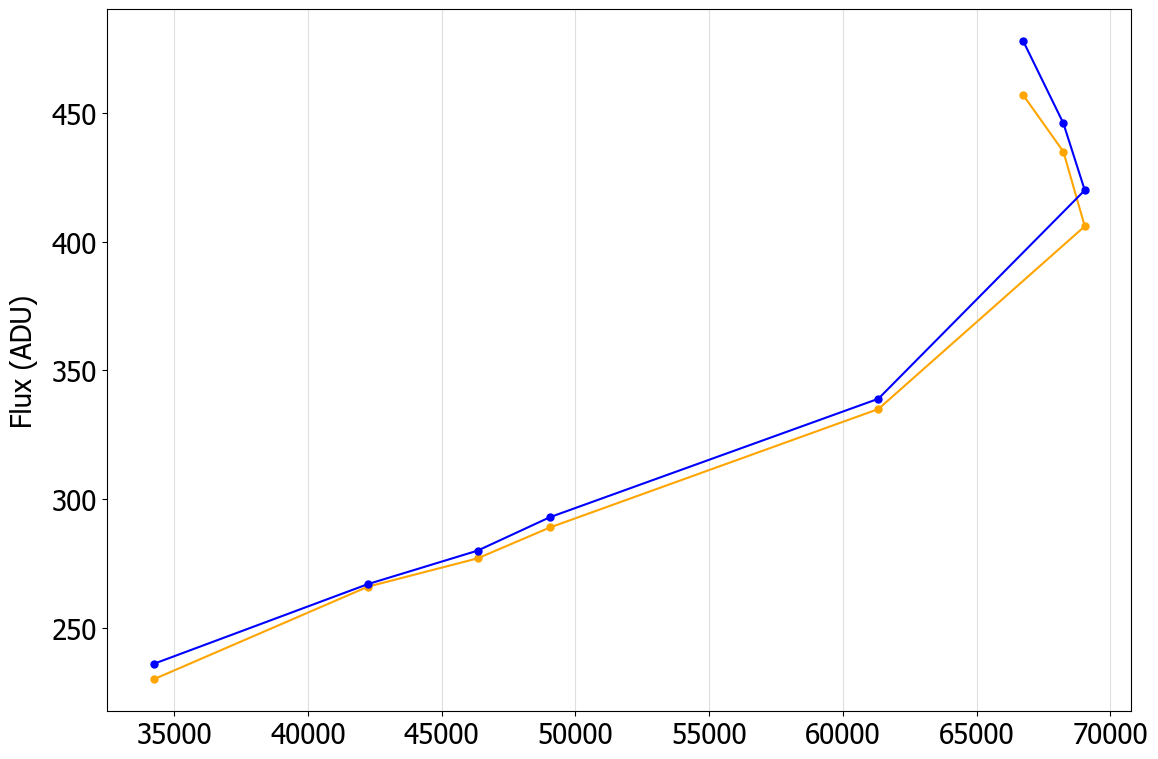

In [6]:
camid = 'LSS'

vmags = pd.read_pickle(f'{datadir}full_data/vmags_july/vmags_{camid}.p')
subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rcParams['font.size'] = 20  


def plot_single():
    
    fig, ax = plt.subplots(1, 1, figsize=[12,8])
    
    satnums = list(subset)
    satnum = satnums[3]

    fluxes = []
    tle_length = []
    fot_length = []
    flags = subset[satnum]['flags']

    for lstseq in subset[satnum]['lstseqs']:
        curlstseq = str(lstseq)
        tle_length.append(vmags[curlstseq][satnum]['TLE']['length'])
        fot_length.append(vmags[curlstseq][satnum]['FOTOS']['length'])
        fluxes.append(vmags[curlstseq][satnum]['flux']) 
    sat = vmags[curlstseq][satnum]['name']

    ax.plot(fluxes, tle_length, '-o', markersize=5, c='blue', label='Trail length (TLE)', zorder=2)
    ax.plot(fluxes, fot_length, '-o', markersize=5, c='orange', label='Trail length (delta image)', zorder=1)
    ax.grid(True, axis='x', alpha=0.4, zorder=1)
    ax.set_ylabel('Length (px)', fontsize=20, labelpad=10)
    ax.set_ylabel('Flux (ADU)', fontsize=20, labelpad=10)
    
    plt.tight_layout()
    #plt.savefig(f'{savedir}error_prop_example_single.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
plot_single()

## How much data after limited to subset?

In [6]:
files = sorted(glob.glob('subsets/time_*.p'))
i = 0
j = 0
for f in files:
    camid = f[-5:-2]
    p = pd.read_pickle(f)
    i += len(p)
    x = 0
    for sat in p:
        x += len(p[sat]['lstseqs'])
    j += x
    print(camid, len(p), x)
print(i, j)

LSC 7 41
LSE 10 72
LSN 3 18
LSS 6 41
LSW 13 111
39 283


In [32]:
def compute_sigmaF():
    rms_list = []
    camids = ['LSC','LSN','LSS','LSE','LSW']
    for camid in camids:
        vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
        subset = pd.read_pickle(f'subsets/time_subset_{camid}.p')

        for i, satnum in enumerate(subset.keys()):

            JDs = []
            fluxes = []
            for lstseq in subset[satnum]['lstseqs']:
                curlstseq = str(lstseq)
                JDs.append(vmags[curlstseq]['JD0'])
                fluxes.append(vmags[curlstseq][satnum]['flux']) 

            times = Time(JDs, format='jd')
            seconds_per_day = 86400
            elapsed_time = ((times - times[0]) * seconds_per_day).value

            # linear regression
            slope, intercept, r_value, p_value, std_err = linregress(elapsed_time, fluxes)
            line = slope * elapsed_time + intercept
            residuals = fluxes - line
            rms = np.sqrt(np.mean(residuals**2))
            y_range = max(fluxes) - min(fluxes)
            normalized_rms = rms / y_range
            rms_list.append(normalized_rms)
            
    sigma_F = np.std(rms_list)
    print(f'For {len(rms_list)} RMS calculations:')
    print(f'Standard deviation (sigma_F) = {round(sigma_F,4)}')
    return sigma_F

In [35]:
sigma_F = compute_sigmaF()
print(sigma_F)

# previously, it was sigma_F = 0.0471

For 39 RMS calculations:
Standard deviation (sigma_F) = 0.0866
0.08658855727735504


In [39]:
# TEST

camid = 'LSC'
vmags = pd.read_pickle(f'{datadir}vmags_flux/vmags_{camid}.p')
flux    = vmags['48506281']['51802U']['flux']
satname = vmags['48506281']['51802U']['name']
satvmag = vmags['48506281']['51802U']['vmag']
sigma_B = vmags['48506281']['51802U']['sigma_B']

sigma_m = error_prop(flux, sigma_F, sigma_B)

print(r'{}: m = {} +/- {}'.format(satname, round(satvmag,3), round(sigma_m,3)))

STARLINK-3557: m = 4.915 +/- 0.019


In [41]:
all_vmags, all_deltas = compute_vmag_errors(sigma_F)

In [42]:
vmags = pd.read_pickle(f'vmag_errors_LSC.p')

In [43]:
vmags['48506274']

{'48369U': {'vmag': 4.788555023682628, 'delta': 0.021859707672028602},
 '51797U': {'vmag': 5.053047854501379, 'delta': 0.019978141285525143}}

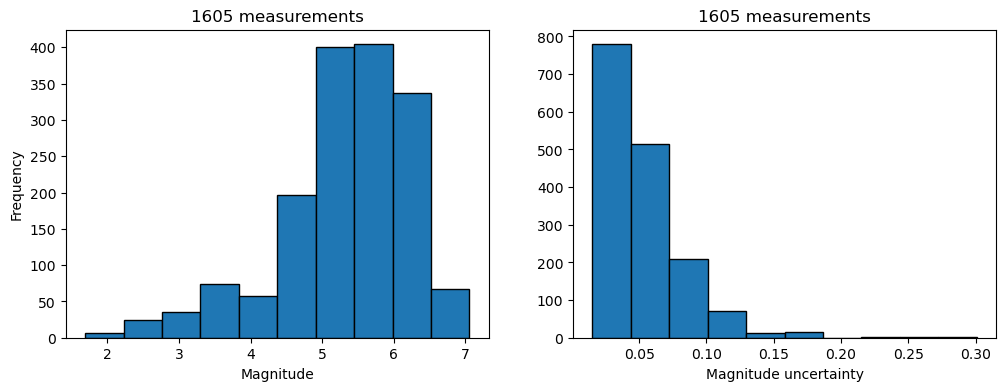

In [44]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=[12,4])

ax1.hist(all_vmags, ec='k')
ax1.set_title(f'{len(all_vmags)} measurements')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Frequency')

ax2.hist(all_deltas, ec='k')
ax2.set_title(f'{len(all_deltas)} measurements')
ax2.set_xlabel('Magnitude uncertainty')

plt.show()

# Poster

In [83]:
def poster_subset_length_time():
    
    camids = ['LSC','LSN','LSS','LSE','LSW']
    
    for camid in camids:
        
        subset = {}
        data = pd.read_pickle(f'subsets/length_subset_{camid}.p')
        
        for i, lstseq in enumerate(data.keys(), start=1):
            JD0 = data[lstseq]['JD0']
            sats = list(data[lstseq])[2:]
            for sat in sats:
                if sat not in subset.keys():
                    subset[sat] = {}
                vmag = data[lstseq][sat]['vmag']
                subset[sat][f'JD{i}'] = {'JD0':JD0, 'lstseq':lstseq, 'vmag':vmag}
        
        subset_reduced = {}
        for sat in subset.keys():
            if len(subset[sat]) < 3:
                continue
            jds = subset[sat].keys()
            vmags = []
            curlstseqs = []
            for jd in jds:
                vmags.append(subset[sat][jd]['vmag'])
                curlstseqs.append(int(subset[sat][jd]['lstseq']))
                
            # Check if each LSTSEQ in the list is within 5 digits of the previous one 
            keep = True
            for i in range(1, len(curlstseqs)):
                if abs(curlstseqs[i] - curlstseqs[i-1]) >= 5:
                    keep = False

            for vmag in vmags:
                if vmag > 4:
                    keep = False
                    break
                    
            if keep:
                if sat not in subset_reduced.keys():
                    subset_reduced[sat] = {}
                subset_reduced[sat]['lstseqs'] = curlstseqs
                subset_reduced[sat]['vmags'] = vmags
                
                
        pickle.dump(subset_reduced, open(f'subsets/poster_subset_{camid}.p', 'wb'))


poster_subset_length_time()

In [84]:
files = sorted(glob.glob('subsets/poster_*.p'))
i = 0
j = 0
for f in files:
    camid = f[-5:-2]
    print(camid)
    p = pd.read_pickle(f)
    sats = list(p)
    for sat in sats:
        print(len(p[sat]['lstseqs']))

LSC
3
LSE
3
7
LSN
LSS
4
3
3
LSW
4


In [86]:
p = pd.read_pickle(files[-2])
sats = list(p)
p[sats[0]]

{'lstseqs': [48506568, 48506569, 48506571, 48506572],
 'vmags': [2.5614730644972177,
  2.490331669004883,
  2.20022269573931,
  2.3950620785605032]}

In [ ]:
48510677LSE.fits.gz,48510678LSE.fits.gz,48510679LSE.fits.gz,48510680LSE.fits.gz,48510684LSE.fits.gz,48510686LSE.fits.gz,48510688LSE.fits.gz